## Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.cluster import DBSCAN
from scipy.stats import chi2, zscore
import numpy as np
from sklearn.covariance import MinCovDet
import scipy as sp
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
import missingno

## anc

In [2]:
df_anc = pd.read_csv('../data/csv_data/complete_data/anc.csv', low_memory = False)

In [3]:
df = df_anc.copy()
df = df.dropna(subset = ['state'])
df['anc_date'] = pd.to_datetime(df['anc_date'], format = '%Y-%m-%d %H:%M:%S')
df['tt_date'] = pd.to_datetime(df['tt_date'], format = '%Y-%m-%d %H:%M:%S') 
df['created_on'] = pd.to_datetime(df['created_on'], format = '%Y-%m-%d %H:%M:%S')
df = df.drop(df[df['anc_date'].dt.strftime('%Y') > '2020'].index)
df.head()

,id,state,district,abortion_type,abortion_date,abortion_if_any,abortion_preg_weeks,rural_urban,odema_feet,anc_date,...,weight,isactive,previous_status,ifa_given,ppmc,tt_code,urine_test,foetal_movements,created_on,hb_gm
0,1,Haryana,Panchkula,NaN,NaN,No,NaN,Rural,No,2019-05-28,...,40.0,NaN,PW,0.0,NaN,TT/TD (1st Dose),Yes,default,2019-06-26 15:34:56,11.2
1,2,Haryana,Panchkula,NaN,NaN,No,NaN,Rural,No,2019-05-14,...,67.0,NaN,PW,0.0,NaN,TT/TD (2nd Dose),Yes,default,2019-06-26 11:20:41,10.0
2,3,Haryana,Panchkula,NaN,NaN,No,NaN,Rural,No,2017-04-11,...,45.0,NaN,PW,0.0,NaN,TT/TD (2nd Dose),Yes,default,2017-05-27 12:39:27,11.6
3,4,Haryana,Panchkula,NaN,NaN,No,NaN,Rural,No,2017-04-11,...,70.0,NaN,PW,0.0,NaN,TT/TD (2nd Dose),Yes,default,2017-05-27 12:52:16,10.0
4,5,Haryana,Panchkula,NaN,NaN,No,NaN,Rural,No,2017-04-11,...,44.0,NaN,PW,0.0,NaN,TT/TD (2nd Dose),Yes,default,2017-05-27 13:02:54,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1219438 entries, 0 to 1219440
Data columns (total 41 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   id                         1219438 non-null  object        
 1   state                      1219438 non-null  object        
 2   district                   1218915 non-null  object        
 3   abortion_type              1346 non-null     object        
 4   abortion_date              8 non-null        object        
 5   abortion_if_any            1219438 non-null  object        
 6   abortion_preg_weeks        7 non-null        float64       
 7   rural_urban                1219438 non-null  object        
 8   odema_feet                 1219438 non-null  object        
 9   anc_date                   1219438 non-null  datetime64[ns]
 10  anc_no                     1219438 non-null  float64       
 11  bp_distolic                1219438 no

# Univariate EDA

In [37]:
def count_plot(feature, figsize = (7, 7)):
    plt.figure(figsize = figsize)
    sns.countplot(data = df, x = feature, palette = 'ch:.25_r')
    plt.xticks(rotation = 90)
    plt.show()
    
def hist_plot(feature, figsize = (15, 7), bins = 10):
    plt.figure(figsize = figsize)
    sns.histplot(x = df[feature], kde = False, bins = bins)
    plt.show()

def kde_plot(feature, figsize = (15, 7)):
    plt.figure(figsize = figsize)
    sns.kdeplot(x = df[feature], shade = True, bw_adjust = 5)
    plt.show()
        
def pie_chart(feature, figsize = (7, 7)):
    plt.figure(figsize = figsize)
    plt.pie(df[feature].value_counts(), labels = df[feature].value_counts().index.values, autopct = '%1.1f%%', shadow = True, pctdistance = 0.8)
    plt.show()

def scatter_plot(feature, figsize = (15, 7)):
    plt.figure(figsize = figsize)
    sns.scatterplot(x = df.index, y = df[feature])
    plt.show()
    
def box_plot(feature, figsize = (15, 7)):
    plt.figure(figsize = figsize)
    sns.boxplot(x = df[feature])
    plt.show()
    
def desc_stats(feature):
    print(f'No. of unique values: {df[feature].nunique()}')
    print(f'Unique values: {df[feature].dropna().unique()}')
    print(f'Null values: {df[feature].isna().sum()}')
    print(f'Null %: {df[feature].isna().mean() * 100}')

<AxesSubplot:>

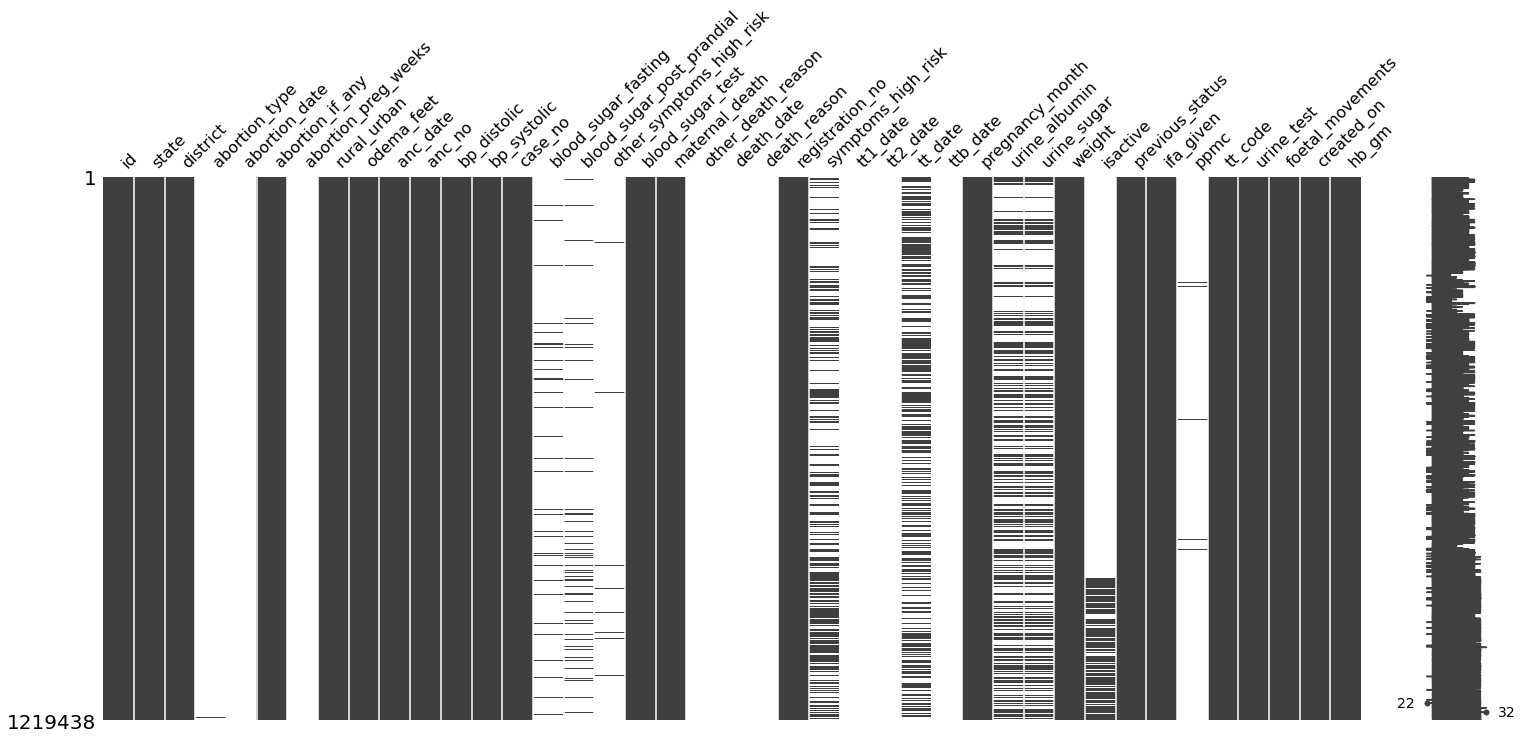

In [38]:
missingno.matrix(df)

In [40]:
sns.set(style = 'whitegrid')

<AxesSubplot:>

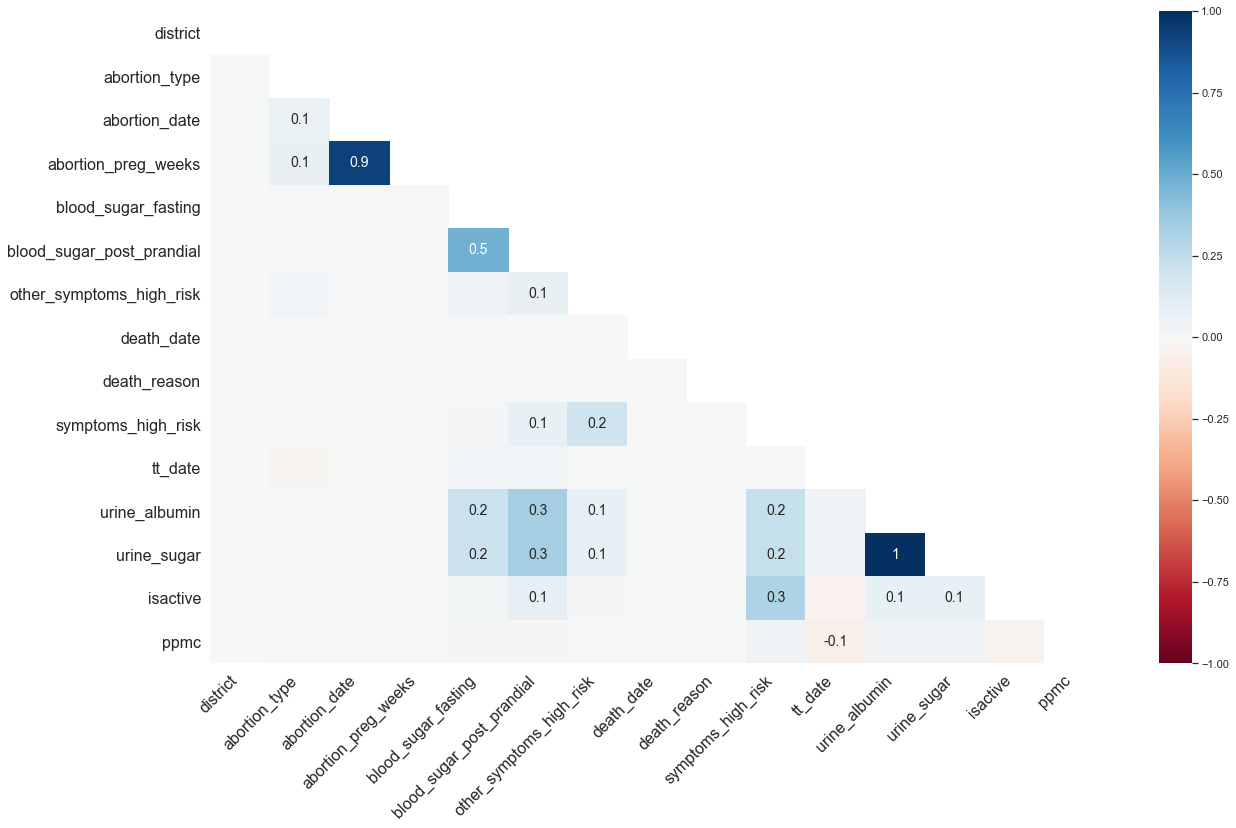

In [41]:
missingno.heatmap(df)

## id

In [139]:
desc_stats_cat('id')

No. of unique values: 1219441
Unique values: ['1' '2' '3' ... '1219439' '1219440' '1219441']
Null values: 0
Null %: 0.0


- All id's are unique.
- No null values

## state

In [140]:
desc_stats('state')

No. of unique values: 1
Unique values: ['Haryana']
Null values: 0
Null %: 0.0


- Only one state: Haryana
- No missing values

## district

In [141]:
desc_stats_cat('district')

No. of unique values: 12
Unique values: ['Panchkula' 'Mewat' 'Palwal' 'Yamunanagar' 'Ambala' 'Kaithal'
 'Mahendragarh' 'Hisar' 'Sirsa' 'Karnal' 'Jind' 'Gurgaon']
Null values: 523
Null %: 0.00042888503830853646


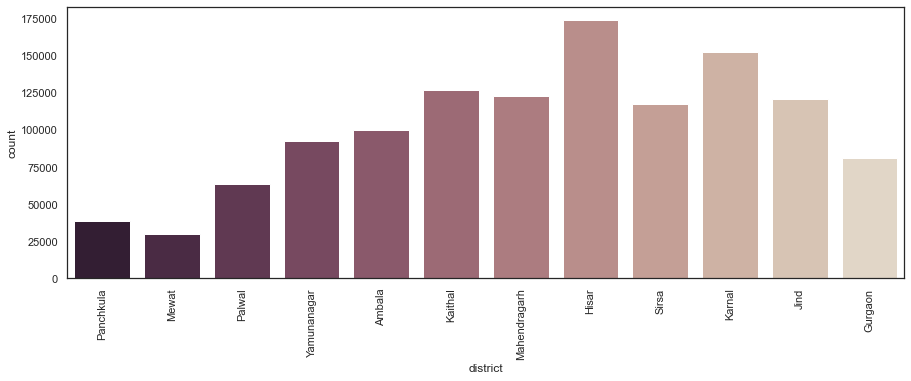

In [135]:
count_plot('district', (15, 5))

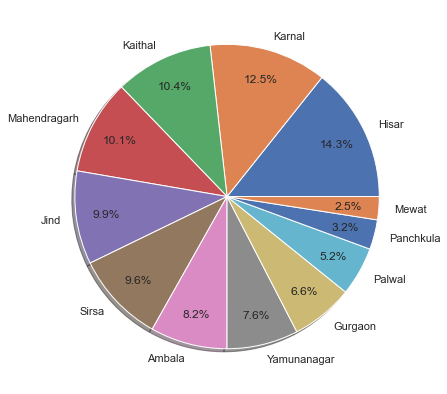

In [151]:
pie_chart('district', (7, 7))

- Data from 12 districts.
- Minimal missing values present.
- Highest no. of cases from Hisar(14.3%), least from Mewat(2.5%).

## abortion_type

In [142]:
desc_stats('abortion_type')

No. of unique values: 2
Unique values: ['Induced' 'Spontaneous']
Null values: 1218095
Null %: 99.88962155610645


- Mostly misssing values

## abortion_date

In [153]:
desc_stats('abortion_date')

No. of unique values: 8
Unique values: ['2019-04-21 00:00:00' '2019-04-28 05:30:00' '2020-02-04 05:30:00'
 '2020-02-11 05:30:00' '2020-03-08 05:30:00' '2020-01-22 05:30:00'
 '2020-05-09 05:30:00' '2020-02-28 05:30:00']
Null values: 1219433
Null %: 99.99934396170048


- Mostly missing values

## abortion_if_any

In [154]:
desc_stats('abortion_if_any')

No. of unique values: 2
Unique values: ['No' 'Yes']
Null values: 0
Null %: 0.0


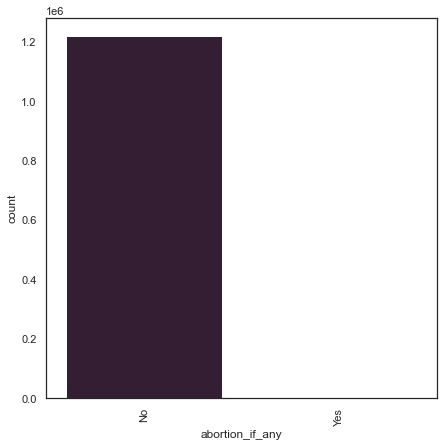

In [155]:
count_plot('abortion_if_any')

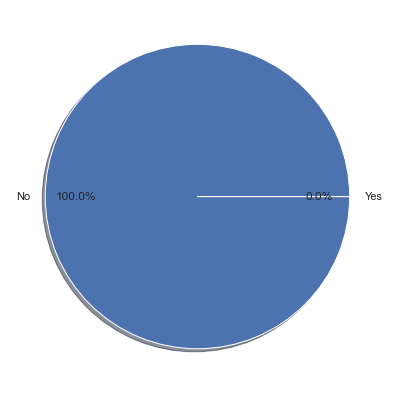

In [156]:
pie_chart('abortion_if_any')

In [157]:
df['abortion_if_any'].value_counts()

No     1219432
Yes          9
Name: abortion_if_any, dtype: int64

In [163]:
df['abortion_date'].value_counts()

2020-02-28 05:30:00    1
2019-04-21 00:00:00    1
2020-03-08 05:30:00    1
2020-02-04 05:30:00    1
2020-05-09 05:30:00    1
2020-01-22 05:30:00    1
2019-04-28 05:30:00    1
2020-02-11 05:30:00    1
Name: abortion_date, dtype: int64

In [158]:
df[df['abortion_if_any'] == 'Yes']

,id,state,district,abortion_type,abortion_date,abortion_if_any,abortion_preg_weeks,rural_urban,odema_feet,anc_date,...,weight,isactive,previous_status,ifa_given,ppmc,tt_code,urine_test,foetal_movements,created_on,hb_gm
895706,895706,Haryana,Ambala,Spontaneous,NaN,Yes,NaN,Rural,No,2019-05-13 00:00:00,...,51.0,NaN,PW,0.0,NaN,TT/TD (1st Dose),default,default,2019-12-05 13:41:55,11.2
898073,898074,Haryana,Kaithal,Induced,NaN,Yes,NaN,Rural,No,2019-10-07 00:00:00,...,40.0,NaN,PW,0.0,NaN,default,default,default,2019-12-06 10:25:25,0.0
933852,933853,Haryana,Jind,Induced,NaN,Yes,NaN,Rural,No,2019-01-09 05:30:00,...,45.0,t,PW,0.0,NaN,TT/TD (1st Dose),No,Absent,2019-12-21 05:30:00,0.0
941851,941851,Haryana,Mahendragarh,NaN,NaN,Yes,NaN,Rural,No,2019-07-17 05:30:00,...,48.0,t,PW,0.0,NaN,default,Yes,default,2019-12-24 05:30:00,8.0
972055,972056,Haryana,Jind,Induced,NaN,Yes,NaN,Rural,No,2019-11-27 05:30:00,...,57.0,t,PW,0.0,NaN,default,default,Absent,2020-01-09 05:30:00,0.0
1004210,1004211,Haryana,Gurgaon,Induced,NaN,Yes,NaN,Rural,No,2018-12-12 05:30:00,...,44.0,t,PW,60.0,NaN,default,No,Normal,2020-01-29 05:30:00,0.0
1013883,1013883,Haryana,Yamunanagar,Spontaneous,NaN,Yes,NaN,Rural,No,2018-08-10 05:30:00,...,59.0,t,PW,0.0,NaN,default,default,default,2020-02-02 05:30:00,10.0
1014596,1014595,Haryana,Gurgaon,Induced,NaN,Yes,NaN,Rural,No,2020-01-24 05:30:00,...,45.0,t,PW,0.0,NaN,default,default,default,2020-02-03 05:30:00,0.0
1150611,1150612,Haryana,Hisar,Induced,NaN,Yes,NaN,Rural,No,2020-01-10 05:30:00,...,53.0,t,PW,0.0,NaN,default,default,default,2020-04-02 05:30:00,0.0


In [160]:
df['abortion_type'].value_counts()

Induced        1032
Spontaneous     314
Name: abortion_type, dtype: int64


In [161]:
df[df['abortion_if_any'] == 'No']['abortion_type'].value_counts()

Induced        1026
Spontaneous     312
Name: abortion_type, dtype: int64

In [162]:
df[df['abortion_if_any'] == 'No']['abortion_date'].value_counts()

2020-02-28 05:30:00    1
2019-04-21 00:00:00    1
2020-03-08 05:30:00    1
2020-02-04 05:30:00    1
2020-05-09 05:30:00    1
2020-01-22 05:30:00    1
2019-04-28 05:30:00    1
2020-02-11 05:30:00    1
Name: abortion_date, dtype: int64

- Very few marked as "Yes"(9 cases) in "abortion_if_any"
- Even though marked as "No" in "abortion_if_any", 1026 of them marked as Induced & 312 marked as Spontaneous in 'abortion_type'.
- All the cases for which date is available in "abortion_date" is marked as "No" in "abortion_if_any".

## abortion_preg_weeks

In [165]:
desc_stats('abortion_preg_weeks')

No. of unique values: 6
Unique values: [13.  5. 10.  6. 12. 14.]
Null values: 1219434
Null %: 99.99942596648792


- Mostly missing values.
- Missing values too for cases which were marked as 'Yes' in 'abortion_if_any'.

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1219441 entries, 0 to 1219440
Data columns (total 41 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   id                         1219441 non-null  object 
 1   state                      1219441 non-null  object 
 2   district                   1218918 non-null  object 
 3   abortion_type              1346 non-null     object 
 4   abortion_date              8 non-null        object 
 5   abortion_if_any            1219441 non-null  object 
 6   abortion_preg_weeks        7 non-null        float64
 7   rural_urban                1219441 non-null  object 
 8   odema_feet                 1219441 non-null  object 
 9   anc_date                   1219441 non-null  object 
 10  anc_no                     1219441 non-null  float64
 11  bp_distolic                1219441 non-null  float64
 12  bp_systolic                1219441 non-null  float64
 13  case_no     

## rural_urban

In [167]:
desc_stats('rural_urban')

No. of unique values: 1
Unique values: ['Rural']
Null values: 0
Null %: 0.0


- No urban cases.
- No missing values

## odema_feet

In [168]:
desc_stats('odema_feet')

No. of unique values: 1
Unique values: ['No']
Null values: 0
Null %: 0.0


- All entried marked as No.
- No missing values.

## anc_date

In [169]:
desc_stats('anc_date')

No. of unique values: 2249
Unique values: ['2019-05-28 00:00:00' '2019-05-14 00:00:00' '2017-04-11 00:00:00' ...
 '2020-05-28 00:00:00' '2020-05-29 05:30:00' '2020-05-30 05:30:00']
Null values: 0
Null %: 0.0


In [174]:
df['anc_date'] = pd.to_datetime(df['anc_date'], format = '%Y-%m-%d %H:%M:%S')

In [184]:
df.groupby(df['anc_date'].dt.strftime('%Y-%m'))['id'].size().sort_index()

anc_date
2017-04    22867
2017-05    25491
2017-06    25268
2017-07    26454
2017-08    25050
2017-09    23384
2017-10    21503
2017-11    20719
2017-12    21176
2018-01    20196
2018-02    24896
2018-03    24438
2018-04    31277
2018-05    33729
2018-06    34132
2018-07    36636
2018-08    33883
2018-09    32016
2018-10    32017
2018-11    31914
2018-12    32393
2019-01    32414
2019-02    31633
2019-03    37618
2019-04    46327
2019-05    49002
2019-06    47826
2019-07    52625
2019-08    49505
2019-09    45883
2019-10    41520
2019-11    41886
2019-12    37866
2020-01    36719
2020-02    34920
2020-03    26417
2020-04    18349
2020-05     9489
2024-10        1
2044-07        1
2044-08        1
Name: id, dtype: int64

- Rows with 'anc_date' in future found. Dropping such rows.

In [188]:
df[df['anc_date'].dt.strftime('%Y') > '2020']

,id,state,district,abortion_type,abortion_date,abortion_if_any,abortion_preg_weeks,rural_urban,odema_feet,anc_date,...,weight,isactive,previous_status,ifa_given,ppmc,tt_code,urine_test,foetal_movements,created_on,hb_gm
357586,357587,Haryana,Karnal,NaN,NaN,No,NaN,Rural,No,2044-08-27,...,NaN,NaN,PW,0.0,NaN,default,default,default,2014-06-18 11:26:48,0.0
684060,684060,Haryana,Sirsa,NaN,NaN,No,NaN,Rural,No,2044-07-28,...,NaN,NaN,PW,0.0,NaN,default,default,default,2014-03-22 12:06:13,0.0
748431,748432,Haryana,Sirsa,NaN,NaN,No,NaN,Rural,No,2024-10-01,...,NaN,NaN,PW,0.0,NaN,default,default,default,2014-06-18 12:04:35,0.0


In [190]:
df = df.drop(df[df['anc_date'].dt.strftime('%Y') > '2020'].index)

In [192]:
date_series = df.groupby(df['anc_date'].dt.strftime('%Y-%m'))['id'].size().sort_index()

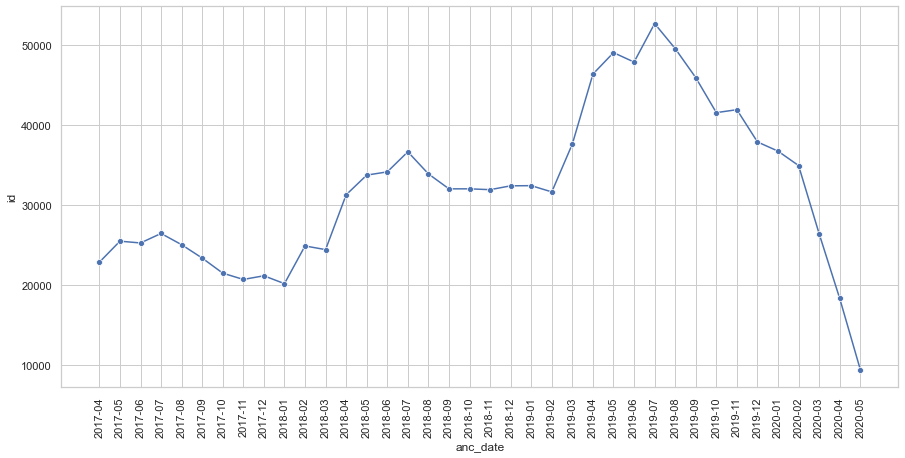

In [200]:
plt.figure(figsize = (15, 7))
sns.set(style = 'whitegrid')
sns.lineplot(data = date_series, marker = 'o')
plt.xticks(rotation = 90)
plt.show()

In [201]:
date_series.describe()

count       38.000000
mean     32090.473684
std       9915.837577
min       9489.000000
25%      24934.500000
50%      32016.500000
75%      37393.250000
max      52625.000000
Name: id, dtype: float64

- The data was recorded over a span of 38 months.
- The highest no. of cases were recorded in Jul'19 & the least in May'20.
- The average no. of cases recorded were 32090 in each month.

## anc_no

In [202]:
desc_stats('anc_no')

No. of unique values: 11
Unique values: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 11. 10.]
Null values: 0
Null %: 0.0


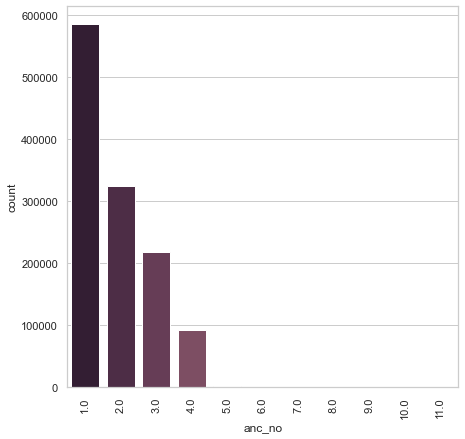

In [203]:
count_plot('anc_no')

In [204]:
df['anc_no'].value_counts()

1.0     585479
2.0     323641
3.0     217691
4.0      91285
5.0       1054
6.0        184
7.0         46
8.0         31
9.0         22
10.0         3
11.0         2
Name: anc_no, dtype: int64

- No null values
- Most of the cases registered are 1st ANC. The no.of cases decreases for further ANCs.
- Only 2 people have completed all 11 ANCs.

## bp_dystolic

In [206]:
desc_stats('bp_distolic')

No. of unique values: 167
Unique values: [ 71.  70.  81.  83.  85.  66.  64.  80.  86.  74.  87.  69.  58.  75.
  68.  67.  60. 100.  62.  77.  72.  61.  65.  73.  91.  63.  55.  88.
  79.  76.  78.  90.  56.  82.  84.  52. 128.  89.   0.  92.  98.  95.
  93.  94.  57.  59.  50.  47. 104.  99.  96.  97.  54.  42.  44.  51.
 130.  45. 102.  46. 110. 105. 126.  40. 112.  53. 127. 106. 116. 124.
 120. 115. 121. 123. 114. 122. 138. 140. 118. 113.  43.  48. 108.  49.
 125.  39.  34.  32. 109.  38.  33.  35. 117. 165. 111.  37. 134. 190.
 170.  41. 872. 847. 180. 103. 107. 142. 700. 709. 720. 701. 770. 132.
 101. 151. 660. 137. 776.  30. 576. 714. 160. 172. 129. 164. 809. 780.
 801. 749. 600. 143. 878. 768. 166. 852. 854. 620. 863. 857. 710. 612.
 119.  31. 136.  36. 763. 802. 723. 182. 721. 747. 176. 789. 682. 708.
 156. 500. 740. 650. 625. 702. 690. 144. 722. 135. 609. 194. 139.]
Null values: 0
Null %: 0.0


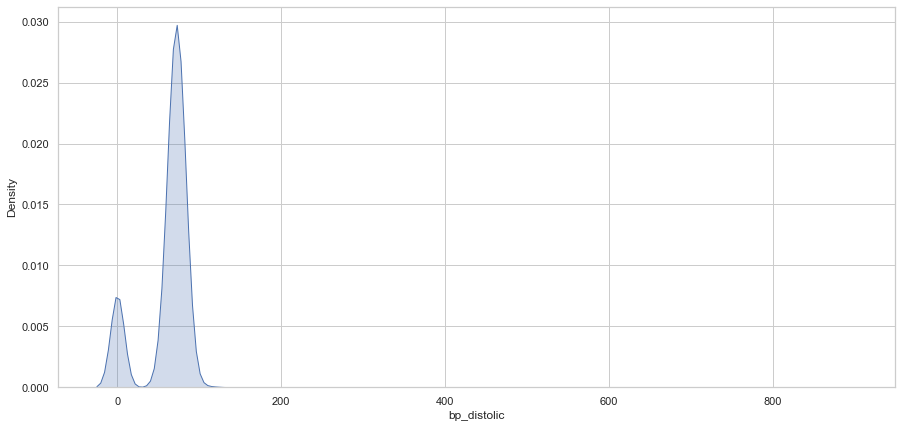

In [261]:
kde_plot('bp_distolic')

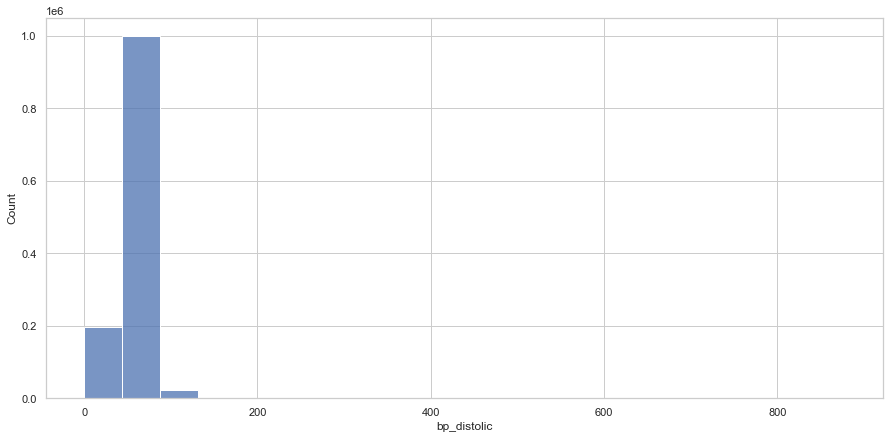

In [259]:
hist_plot('bp_distolic', bins = 20)

In [223]:
df['bp_distolic'].describe()

count    1.219438e+06
mean     6.057594e+01
std      2.782822e+01
min      0.000000e+00
25%      6.000000e+01
50%      7.000000e+01
75%      7.800000e+01
max      8.780000e+02
Name: bp_distolic, dtype: float64

<AxesSubplot:ylabel='bp_distolic'>

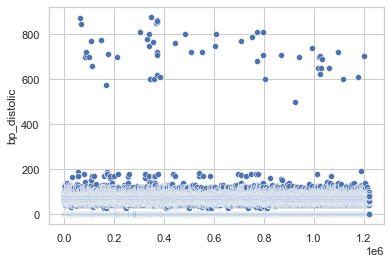

In [224]:
sns.scatterplot(x = df.index, y = df['bp_distolic'])

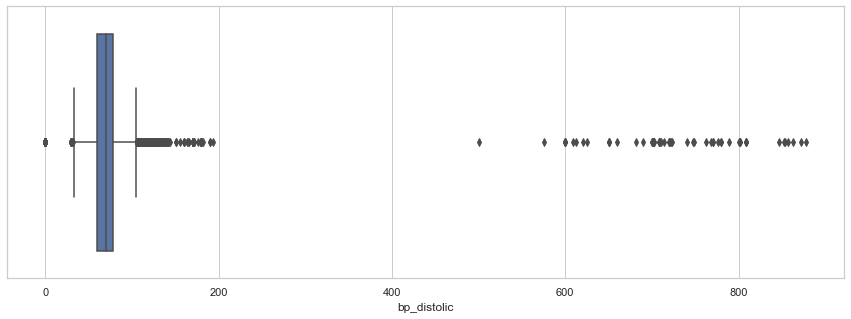

In [270]:
plt.figure(figsize = (15, 5))
sns.boxplot(x = df['bp_distolic'])
plt.show()

- Grouping "bp_distolic" based on the following ranges:
    - 0-50: Outliers
    - 50-60: Hypotension
    - 60-80: Normal
    - 80-90: Hypertension-1
    - 90-120: Hypertension-2
    - 120-200: Hypertension Crisis
    - 200-878: Outliers

In [247]:
category = pd.cut(df['bp_distolic'], bins = [-1, 50, 60, 80, 90, 120, 200, 878], labels = ['outliers', 'hypotension', 'normal', 'hypertension-1', 'hypertension-2', 'hypertension crisis', 'outliers'], ordered = False)
df.insert(12, 'bp_distolic_group', category)

In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1219438 entries, 0 to 1219440
Data columns (total 42 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   id                         1219438 non-null  object        
 1   state                      1219438 non-null  object        
 2   district                   1218915 non-null  object        
 3   abortion_type              1346 non-null     object        
 4   abortion_date              8 non-null        object        
 5   abortion_if_any            1219438 non-null  object        
 6   abortion_preg_weeks        7 non-null        float64       
 7   rural_urban                1219438 non-null  object        
 8   odema_feet                 1219438 non-null  object        
 9   anc_date                   1219438 non-null  datetime64[ns]
 10  anc_no                     1219438 non-null  float64       
 11  bp_distolic                1219438 no

In [253]:
df['bp_distolic_group'].value_counts()['outliers'] / df['bp_distolic_group'].value_counts().sum() * 100

16.515148781651874

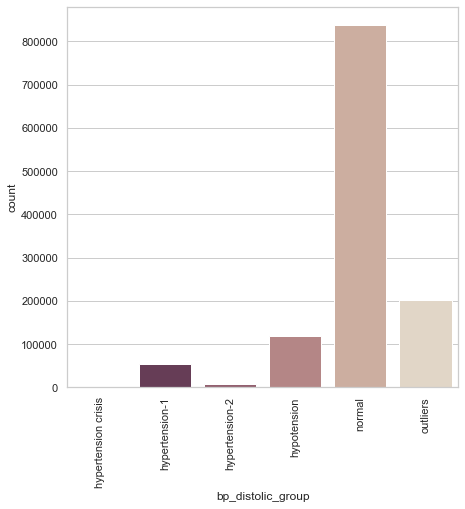

In [290]:
count_plot('bp_distolic_group')

In [294]:
df['bp_distolic_group'].value_counts(normalize = True) * 100

normal                 68.779799
outliers               16.515149
hypotension             9.756708
hypertension-1          4.385545
hypertension-2          0.538117
hypertension crisis     0.024684
Name: bp_distolic_group, dtype: float64

- 16% of the bp_distolic values are outliers. They need to be replaced or removed.
- Most of the cases are normal (69%).
- No null values.
- Most of the values are between 60-80.
- Average diastolic BP recorded is 60.5.

## bp_systolic

In [254]:
desc_stats('bp_systolic')

No. of unique values: 160
Unique values: [100. 114. 118. 109. 116.  88. 117. 127. 115. 105. 119. 110. 112.  87.
 102. 101. 120. 160. 113.  98.  97.  93. 121.  94. 106. 108.  91.  90.
  95. 111. 104.  80. 136.  99. 123. 107. 128. 126.  89. 103. 124. 149.
 122. 138.  96.   0. 129. 145. 125. 130. 140.  92.  74. 131.  85. 155.
 132.  56.  86.  76.  72.  79.  77.  81.  84.  82. 147. 134. 157. 133.
 180. 148. 135.  60. 137. 150. 170. 176. 166. 144. 139. 153. 151.  70.
  58.  69.  50.  65.  64.  62.  83.  78. 165.  73. 143. 163. 152. 159.
  54. 146. 142. 154. 158. 168. 182.  66. 178. 164.  75.  71. 175.  63.
  67.  68.  53. 211. 213. 188. 141. 162. 171. 189. 172. 179. 177. 230.
  55.  57. 169.  61. 156. 192. 184. 400. 202. 161. 196. 190.  52. 191.
 181. 167. 173. 220. 198. 250.  59. 174. 197. 185. 194.  51. 313. 200.
 210. 219. 199. 248. 224. 240.]
Null values: 0
Null %: 0.0


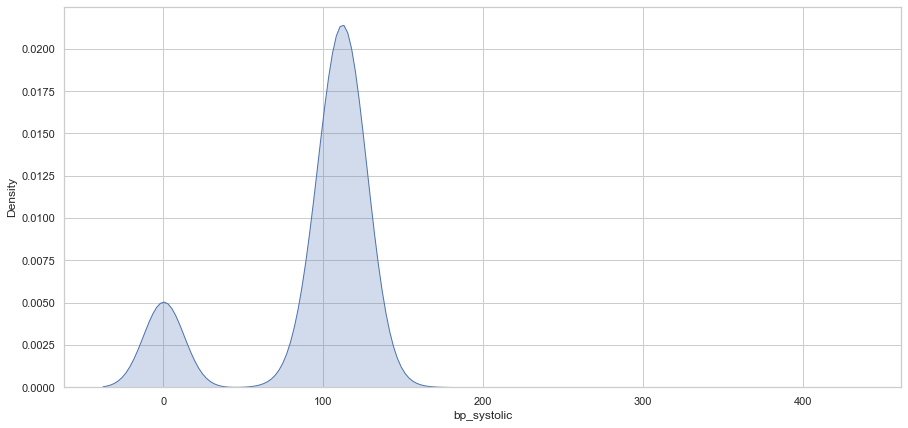

In [262]:
kde_plot('bp_systolic')

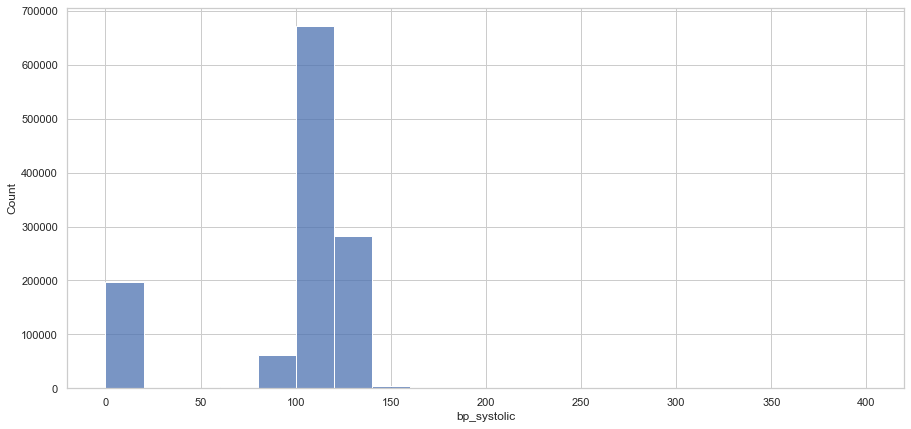

In [263]:
hist_plot('bp_systolic', bins = 20)

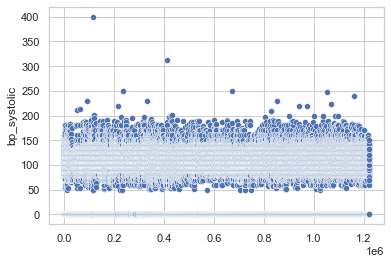

In [266]:
sns.scatterplot(x = df.index, y = df['bp_systolic'])
plt.show()

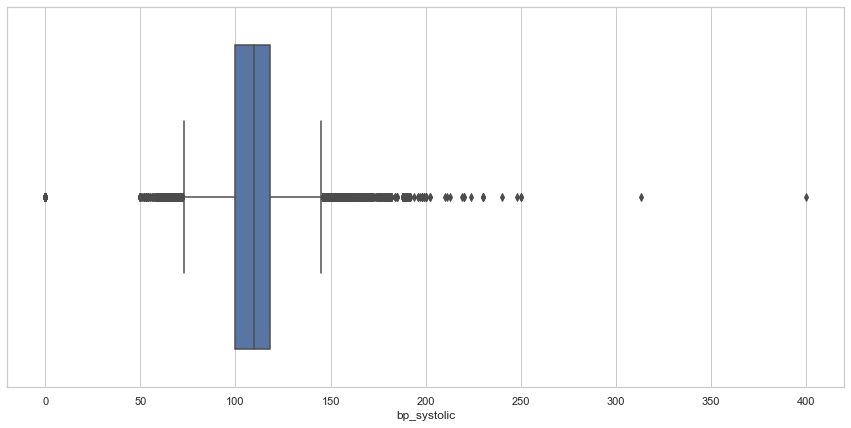

In [276]:
box_plot('bp_systolic')

In [264]:
df['bp_systolic'].describe()

count    1.219438e+06
mean     9.340297e+01
std      4.184545e+01
min      0.000000e+00
25%      1.000000e+02
50%      1.100000e+02
75%      1.180000e+02
max      4.000000e+02
Name: bp_systolic, dtype: float64

- Grouping blood_pressure can be done based on the following ranges:
    - 0-49 systolic or 0-39 diastolic: Outliers
    - 50-89 systolic or 40-59 diastolic: Hypotension
    - 90-119 systolic & 60-79 diastolic: Normal
    - 120-129 systolic & 60-79 diastolic: Elevated
    - 130-139 systolic or 80-89 diastolic: Hypertension-1
    - 140-180 systolic or 90-120 diastolic: Hypertension-2
    - 181-200 systolic or 121-200  : Hypertension Crisis
    - 200-878 systolic or 200-878 diastolic: Outliers

In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1219438 entries, 0 to 1219440
Data columns (total 41 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   id                         1219438 non-null  object        
 1   state                      1219438 non-null  object        
 2   district                   1218915 non-null  object        
 3   abortion_type              1346 non-null     object        
 4   abortion_date              8 non-null        object        
 5   abortion_if_any            1219438 non-null  object        
 6   abortion_preg_weeks        7 non-null        float64       
 7   rural_urban                1219438 non-null  object        
 8   odema_feet                 1219438 non-null  object        
 9   anc_date                   1219438 non-null  datetime64[ns]
 10  anc_no                     1219438 non-null  float64       
 11  bp_distolic                1219438 no

## case_no

In [340]:
desc_stats('case_no')

No. of unique values: 5
Unique values: [2. 1. 3. 4. 5.]
Null values: 0
Null %: 0.0


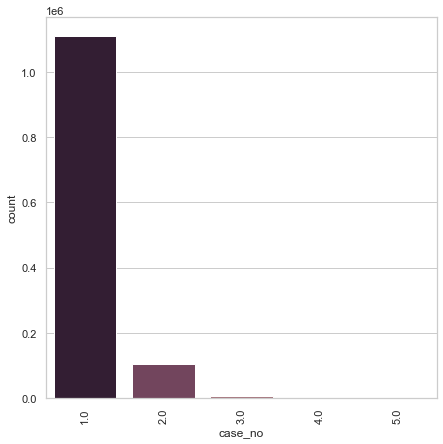

In [341]:
count_plot('case_no')

In [342]:
df['case_no'].value_counts()

1.0    1111714
2.0     102601
3.0       4904
4.0        208
5.0         11
Name: case_no, dtype: int64

- Most of the cases belong to case 1 & the least to case 5.

## blood_sugar_fasting

In [343]:
desc_stats('blood_sugar_fasting')

No. of unique values: 162
Unique values: [ 98.  97.  82. 100. 104.  74.  76.  80.  78.  72.  96.  92.  94.  99.
  88.  89.  91.  90.  93.  85.  95. 110. 105.  84.  87. 102.  86. 115.
  70. 101.  79. 108. 109. 107. 111.  75.  83. 120. 106.  81. 118. 132.
 112. 103. 113. 123. 128. 125.  77. 131. 117.  60. 180. 151. 140.  52.
 122.  45. 121. 358.  68.  66.  62.  64.  61.  65.  36.  39.  35.  58.
  69.  59.  73.  41.  50. 420.  71. 130.  67. 145.  55.  51.  56.  53.
  54.  63. 146. 119. 170.  30.  40. 116. 124. 126. 127. 195. 137. 129.
 220. 152. 178. 212.  32. 136. 133. 148. 114. 138. 135. 197. 149. 156.
 150. 200. 161. 153. 139.  46. 134. 257.  42.  43.  48. 142. 350. 164.
 209.  57. 143. 162. 154. 157. 144. 171. 187. 160. 214.  47. 155. 198.
 167. 168. 166.  49.  38.  34. 199. 158. 179.  44. 141. 147. 193. 182.
 307. 196. 248. 310. 247. 188. 208. 215.]
Null values: 1165624
Null %: 95.58698351207687


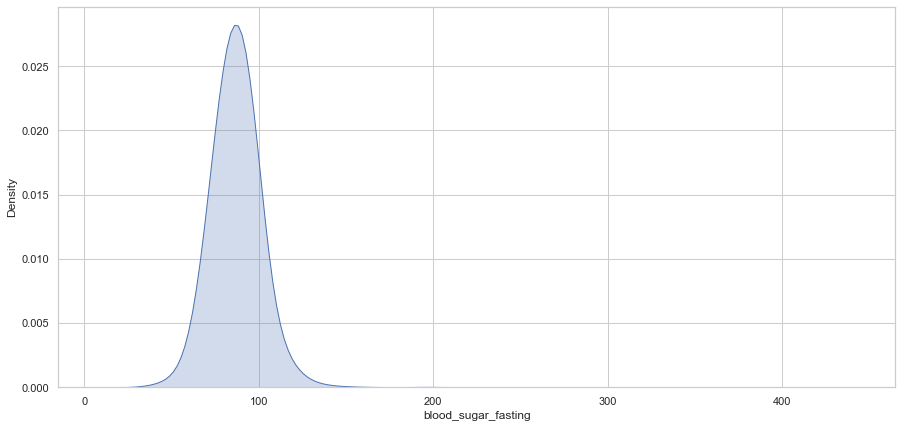

In [344]:
kde_plot('blood_sugar_fasting')

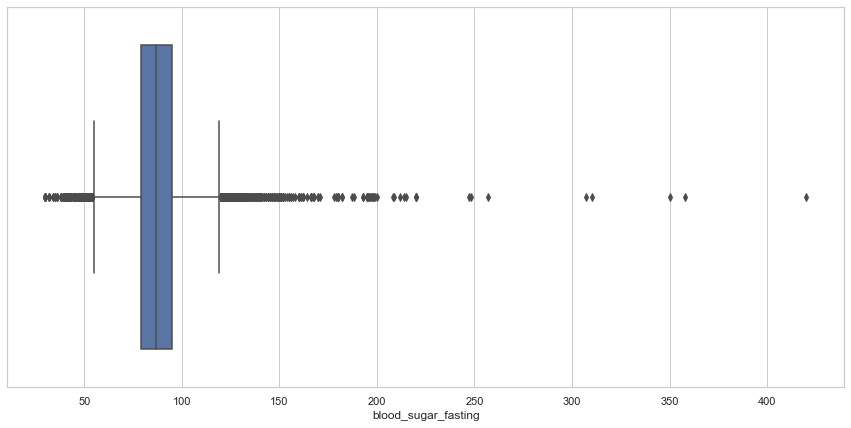

In [345]:
box_plot('blood_sugar_fasting')

- 95% of the values are missing, feature can be removed.
- Most of the values are between 75-100.
- Outliers are present.

In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1219438 entries, 0 to 1219440
Data columns (total 41 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   id                         1219438 non-null  object        
 1   state                      1219438 non-null  object        
 2   district                   1218915 non-null  object        
 3   abortion_type              1346 non-null     object        
 4   abortion_date              8 non-null        object        
 5   abortion_if_any            1219438 non-null  object        
 6   abortion_preg_weeks        7 non-null        float64       
 7   rural_urban                1219438 non-null  object        
 8   odema_feet                 1219438 non-null  object        
 9   anc_date                   1219438 non-null  datetime64[ns]
 10  anc_no                     1219438 non-null  float64       
 11  bp_distolic                1219438 no

## blood_sugar_post_prandial

In [348]:
desc_stats('blood_sugar_post_prandial')

No. of unique values: 388
Unique values: [ 91.  63. 101. 128.  95. 109.  96. 111.  87.  84.  94. 119.  85. 118.
 129. 103.  90. 106.  74.  82.  99. 105. 125.  64.  81.  75.  79. 104.
  83. 112.  89.  73. 100.  80.  66. 107.  92.  88. 185. 139.  76. 113.
 134.  77.  98.  70.  72.  86. 116.  69. 110. 108. 102.  97. 122.  78.
 115. 130. 124. 114. 170. 120. 133.  93. 135. 127. 117. 138. 148.  71.
 123. 121. 136. 142. 143. 164. 140. 132. 144. 137. 126. 147.  62. 900.
 150. 131. 176. 180. 188. 171. 152. 162.  60. 145. 412. 146. 141. 151.
  68.  61.  65. 801. 881. 905. 196. 160. 168. 893. 190. 425.  67. 931.
 220. 250. 973. 920. 149. 300. 854. 731. 983. 165. 158. 161. 155. 192.
 156. 208. 903. 159. 193. 173. 153. 166. 189. 172. 936. 896. 980.  55.
 299. 282. 372. 265. 961. 223. 202. 822. 721. 163. 197. 186. 183. 201.
  58. 221. 982. 902. 320. 200. 195. 240. 236. 174. 167. 154. 182. 187.
 178. 191. 157. 245. 230. 933. 930. 843. 791. 925. 821. 806. 812. 965.
 990. 908. 986. 246. 233. 225. 996. 

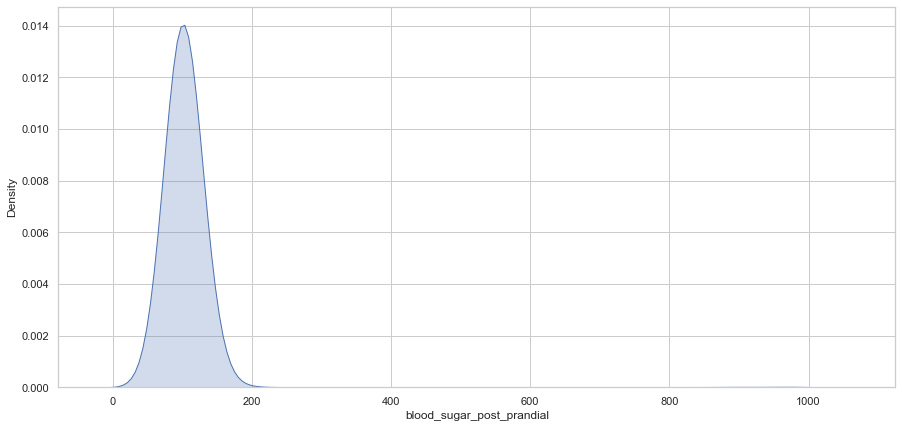

In [349]:
kde_plot('blood_sugar_post_prandial')

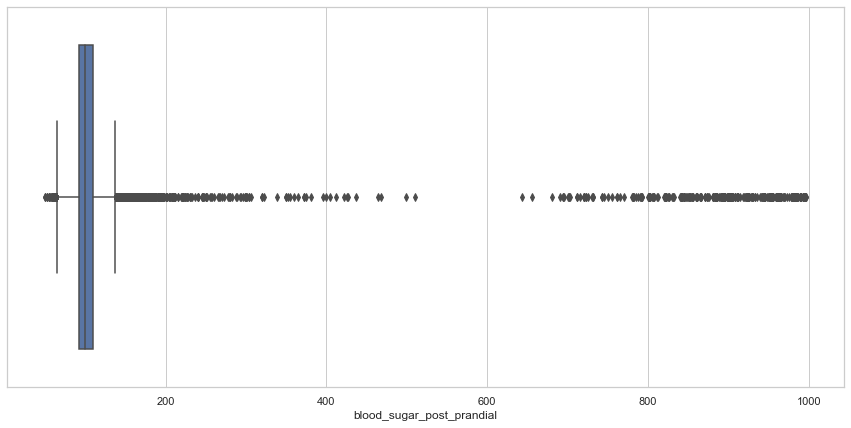

In [350]:
box_plot('blood_sugar_post_prandial')

- 90% of the values are missing, feature can be omitted.
- Most of the values are around 100.
- Outliers are present.

## other_symptoms_high_risk

In [351]:
desc_stats('other_symptoms_high_risk')

No. of unique values: 8560
Unique values: ['low Hb' 'Iud' 'Hb less' ... 'PRIVIAS LSCS' 'less than  three year'
 'early ']
Null values: 1188697
Null %: 97.47908462750874


- 97% missing values, feature can be omitted.
- High no. of unique values, can't be considered as a categorical feature.
- Should be considered as a text feature.

## blood_sugar_test

In [353]:
desc_stats('blood_sugar_test')

No. of unique values: 3
Unique values: ['default' 'No' 'Yes']
Null values: 0
Null %: 0.0


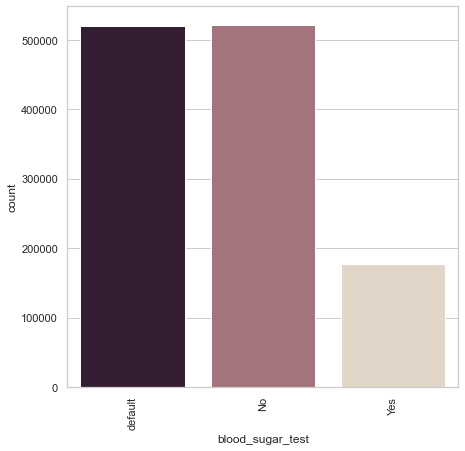

In [354]:
count_plot('blood_sugar_test')

In [355]:
df['blood_sugar_test'].value_counts()

No         521936
default    519884
Yes        177618
Name: blood_sugar_test, dtype: int64

In [15]:
df[df['blood_sugar_test'] == "default"]['blood_sugar_fasting'].unique()

array([nan])

- No missing values.
- Almost equal no. of 'default' & 'no' entries.
- 'default' & 'no' more than 'yes'

In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1219438 entries, 0 to 1219440
Data columns (total 41 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   id                         1219438 non-null  object        
 1   state                      1219438 non-null  object        
 2   district                   1218915 non-null  object        
 3   abortion_type              1346 non-null     object        
 4   abortion_date              8 non-null        object        
 5   abortion_if_any            1219438 non-null  object        
 6   abortion_preg_weeks        7 non-null        float64       
 7   rural_urban                1219438 non-null  object        
 8   odema_feet                 1219438 non-null  object        
 9   anc_date                   1219438 non-null  datetime64[ns]
 10  anc_no                     1219438 non-null  float64       
 11  bp_distolic                1219438 no

## maternal_death

In [358]:
desc_stats('maternal_death')

No. of unique values: 1
Unique values: ['No']
Null values: 0
Null %: 0.0


- No case of maternal death registered.

## other_death_reason

In [359]:
desc_stats('other_death_reason')

No. of unique values: 0
Unique values: []
Null values: 1219438
Null %: 100.0


- 100% missing values

## death_date

In [360]:
desc_stats('death_date')

No. of unique values: 1
Unique values: ['2019-06-12 00:00:00']
Null values: 1219437
Null %: 99.99991799501082


In [20]:
df[df['death_date'] == '2019-06-12 00:00:00']['death_reason']

668843    NaN
Name: death_reason, dtype: object

- 99% missing values, feature can be removed.

## death_reason

In [362]:
desc_stats('death_reason')

No. of unique values: 4
Unique values: ['Other' 'Abortion' 'Haemorrahge' 'Eclampcia']
Null values: 1219422
Null %: 99.99868792017307


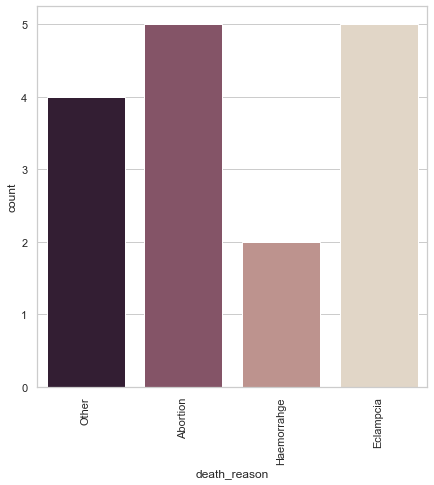

In [363]:
count_plot('death_reason')

In [364]:
df['death_reason'].value_counts()

Abortion       5
Eclampcia      5
Other          4
Haemorrahge    2
Name: death_reason, dtype: int64

- 99% missing values, feature can be removed.
- Most deaths recorded happened due to Abortion & Eclampcia

## registration_no

In [365]:
desc_stats('registration_no')

No. of unique values: 577837
Unique values: [1.06000013e+11 1.06000013e+11 1.06002357e+11 ... 1.06004330e+11
 1.06004372e+11 1.06004381e+11]
Null values: 0
Null %: 0.0


In [369]:
df['registration_no'].value_counts()

106003019504.000    13
106002380227.000    12
106002579648.000    12
106002461534.000    12
106002195375.000    12
                    ..
106002998193.000     1
106002647079.000     1
106004196035.000     1
106003315231.000     1
106002450734.000     1
Name: registration_no, Length: 577837, dtype: int64

In [22]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [371]:
df[df['registration_no'] == 106003019504]['anc_no']

626668    3.000
626719    1.000
626731    2.000
626874    5.000
626988    4.000
895725    1.000
895726    2.000
895727    3.000
895728    4.000
895868    1.000
988188    2.000
1128590   3.000
1191949   4.000
Name: anc_no, dtype: float64

- Multiple entries have been made for same registration no.s, doesnt correspond to the ANC's done over the pregnancy period.

## symptoms_high_risk

In [372]:
desc_stats('symptoms_high_risk')

No. of unique values: 35
Unique values: ['Other,not defined' 'Convulsion' 'Stillbirth' 'ANY Other'
 'Congenital Anomaly' 'Caesarean - Section' 'Congenital Anomaly,ANY Other'
 'Convulsion,ANY Other' 'Stillbirth,ANY Other'
 'Pregnancy Induced Hypertension (PIH)' 'Ante partum haemorrhage (Aph)'
 'Convulsion,Congenital Anomaly' 'Stillbirth,Congenital Anomaly'
 'Convulsion,Caesarean - Section'
 'Convulsion,Ante partum haemorrhage (Aph)' 'Convulsion,Stillbirth'
 'Caesarean - Section,ANY Other' 'Stillbirth,Caesarean - Section'
 'Convulsion,Ante partum haemorrhage (Aph),Pregnancy Induced Hypertension (PIH),Repeated  Abortion'
 'Repeated  Abortion' 'Repeated  Abortion,Stillbirth'
 'Convulsion,Caesarean - Section,ANY Other'
 'Congenital Anomaly,Caesarean - Section'
 'Convulsion,Pregnancy Induced Hypertension (PIH)'
 'Convulsion,Stillbirth,ANY Other'
 'Pregnancy Induced Hypertension (PIH),Repeated  Abortion'
 'Pregnancy Induced Hypertension (PIH),ANY Other'
 'Pregnancy Induced Hypertension (PIH),

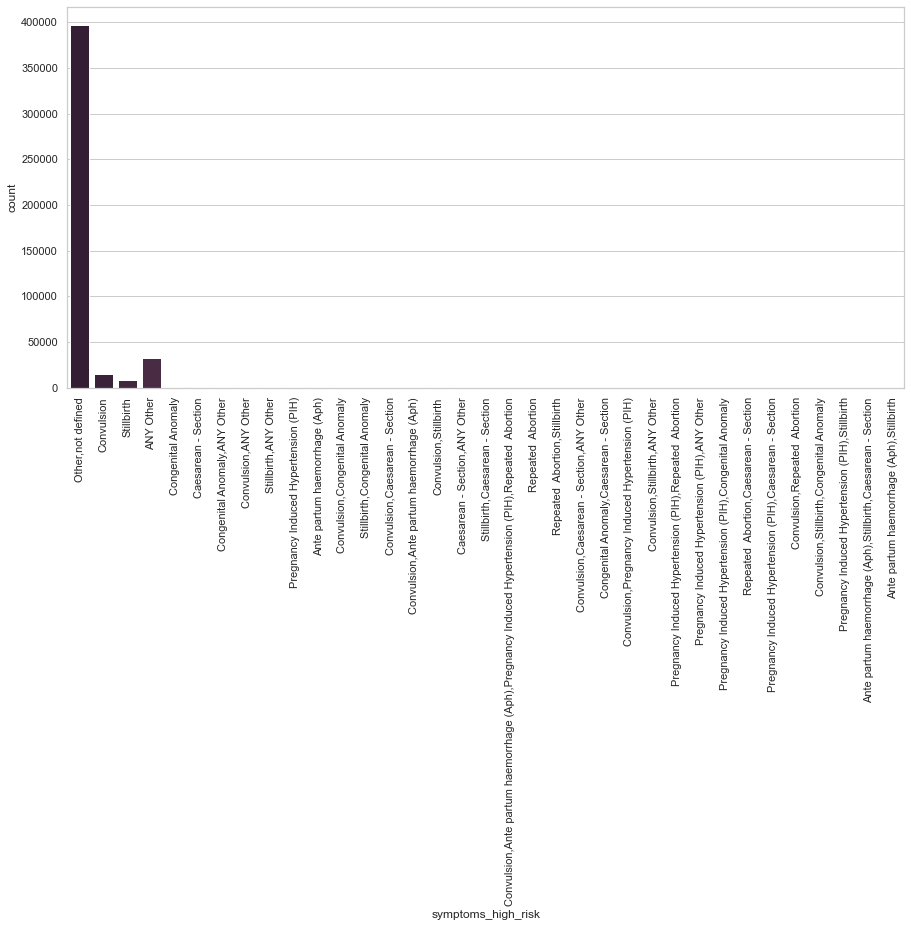

In [374]:
count_plot('symptoms_high_risk', figsize = (15, 7))

In [375]:
df['symptoms_high_risk'].value_counts()

Other,not defined                                                                                   396886
ANY Other                                                                                            32011
Convulsion                                                                                           14460
Stillbirth                                                                                            8095
Caesarean - Section                                                                                   1197
Congenital Anomaly                                                                                     511
Pregnancy Induced Hypertension (PIH)                                                                   417
Convulsion,Stillbirth                                                                                  175
Convulsion,ANY Other                                                                                   174
Ante partum haemorrhage (Aph)        

- 62% missing values, feature can be omitted.
- Most of the entries are classified as 'Other, not defined', doubtful if this classified as Yes/No for high risk symptoms.

## tt1_date

In [377]:
desc_stats('tt1_date')

No. of unique values: 0
Unique values: []
Null values: 1219438
Null %: 100.0


- 100% missing values

In [378]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1219438 entries, 0 to 1219440
Data columns (total 41 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   id                         1219438 non-null  object        
 1   state                      1219438 non-null  object        
 2   district                   1218915 non-null  object        
 3   abortion_type              1346 non-null     object        
 4   abortion_date              8 non-null        object        
 5   abortion_if_any            1219438 non-null  object        
 6   abortion_preg_weeks        7 non-null        float64       
 7   rural_urban                1219438 non-null  object        
 8   odema_feet                 1219438 non-null  object        
 9   anc_date                   1219438 non-null  datetime64[ns]
 10  anc_no                     1219438 non-null  float64       
 11  bp_distolic                1219438 no

## tt2_date

In [379]:
desc_stats('tt2_date')

No. of unique values: 0
Unique values: []
Null values: 1219438
Null %: 100.0


- 100% missing values, feature needs to be removed.

## tt_date

In [381]:
desc_stats('tt_date')

No. of unique values: 2291
Unique values: ['2019-05-28 00:00:00' '2019-05-14 00:00:00' '2017-04-11 00:00:00' ...
 '2020-05-28 05:30:00' '2020-05-29 05:30:00' '2020-05-30 05:30:00']
Null values: 521128
Null %: 42.735096003240834


In [387]:
tt_date_series = df.groupby(df['tt_date'].dt.strftime('%Y-%m'))['id'].size().sort_index()

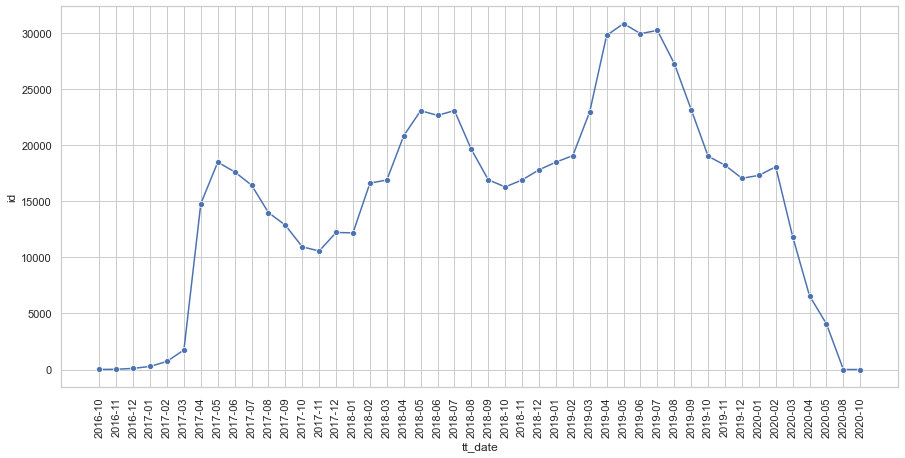

In [394]:
plt.figure(figsize = (15, 7))
sns.set(style = 'whitegrid')
sns.lineplot(data = tt_date_series, marker = 'o')
plt.xticks(rotation = 90)
plt.show()

In [395]:
tt_date_series.describe()

count      46.000
mean    15180.652
std      8882.781
min         1.000
25%     11179.250
50%     16925.000
75%     19500.250
max     30873.000
Name: id, dtype: float64

- Data collected over a span of 46 months.
- Average no. of cases in each month is 15180.

## ttb_date

In [396]:
desc_stats('ttb_date')

No. of unique values: 0
Unique values: []
Null values: 1219438
Null %: 100.0


- 100% missing values, feature should be omitted.

## pregnancy_month

In [397]:
desc_stats('pregnancy_month')

No. of unique values: 59
Unique values: [ 5.  9.  7. 34. 39.  8. 14. 12. 16.  6. 32. 21. 18. 23. 15. 11. 24. 26.
 29. 13. 17. 10. 25. 28. 30. 22. 33. 40. 19. 31. 37. 35. 38. 36. 20. 27.
  4.  0. 43. 69. 52. 60. 44. 53. 48. 42. 89. 51. 61. 67. 62. 49. 45. 47.
 97. 41. 71. 70. 65.]
Null values: 0
Null %: 0.0


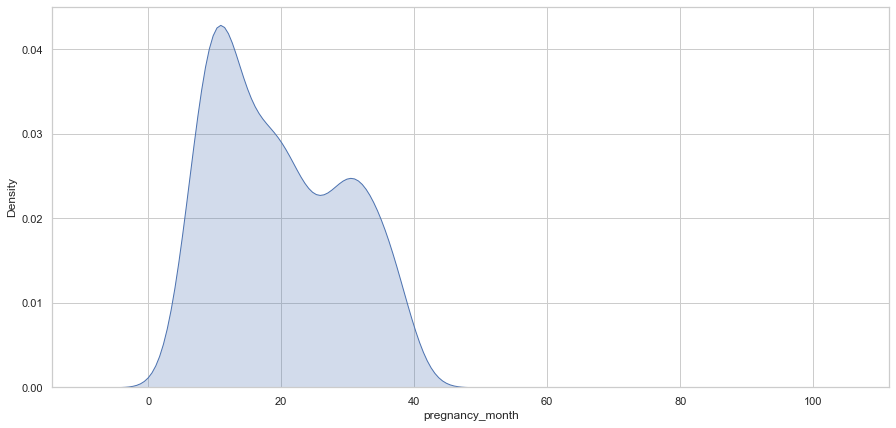

In [398]:
kde_plot('pregnancy_month')

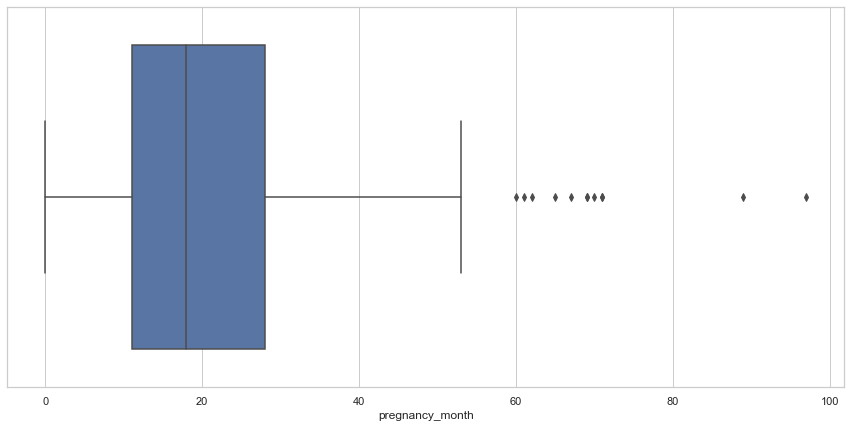

In [399]:
box_plot('pregnancy_month')

- Unable to deduce the meaning of the feature.
- No missing values.
- Most of the values seem to be around 16.
- Outliers are present.

In [23]:
df['pregnancy_month'].describe()

count   1219438.000
mean         19.622
std           9.603
min           0.000
25%          11.000
50%          18.000
75%          28.000
max          97.000
Name: pregnancy_month, dtype: float64

## urine_albumin

In [400]:
desc_stats('urine_albumin')

No. of unique values: 2
Unique values: ['N' 'P']
Null values: 725856
Null %: 59.523813428809014


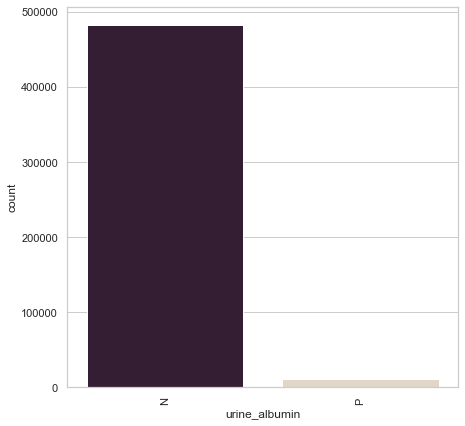

In [401]:
count_plot('urine_albumin')

In [403]:
df['urine_albumin'].value_counts(normalize = True)

N   0.978
P   0.022
Name: urine_albumin, dtype: float64

- 59% missing values. Feature maybe omitted.
- Assuming N = negative & P = positive, most of the cases (97%) are marked N.

## urine_sugar

In [404]:
desc_stats('urine_sugar')

No. of unique values: 2
Unique values: ['N' 'P']
Null values: 726010
Null %: 59.536442197143266


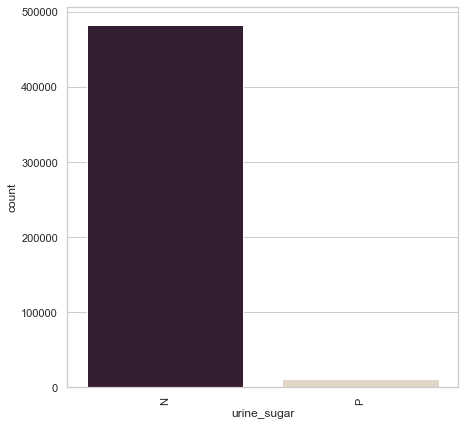

In [405]:
count_plot('urine_sugar')

In [406]:
df['urine_sugar'].value_counts(normalize = True)

N   0.978
P   0.022
Name: urine_sugar, dtype: float64

In [27]:
df[~df['urine_albumin'].isnull()]['urine_sugar'].unique()

array(['N', 'P', nan], dtype=object)

- 59% missing values. Feature maybe omitted.
- Assuming N = negative & P = positive, most of the cases (97%) are marked N.

In [407]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1219438 entries, 0 to 1219440
Data columns (total 41 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   id                         1219438 non-null  object        
 1   state                      1219438 non-null  object        
 2   district                   1218915 non-null  object        
 3   abortion_type              1346 non-null     object        
 4   abortion_date              8 non-null        object        
 5   abortion_if_any            1219438 non-null  object        
 6   abortion_preg_weeks        7 non-null        float64       
 7   rural_urban                1219438 non-null  object        
 8   odema_feet                 1219438 non-null  object        
 9   anc_date                   1219438 non-null  datetime64[ns]
 10  anc_no                     1219438 non-null  float64       
 11  bp_distolic                1219438 no

## weight

In [408]:
desc_stats('weight')

No. of unique values: 132
Unique values: [ 40.  67.  45.  70.  44.  46.  43.  56.  59.  50.  54.  63.  41.  39.
  60.  53.  58.  55.  51.  38.  37.  52.  42.  48.  47.  64.  61.  75.
  35.  57.  65.  49.  74.  66.  62.  77.  81.  69.  72.  76.  33.  73.
  34. 106.  68.  36.  71.  80.  31.  90.  92.  30.  78.  32.  79.  83.
  84.  82. 100.  87.  88.  99.  85.  89. 110.  95.  96.  94.  98.  86.
 111. 113. 120. 107.  93.  91. 105. 116. 115.  97. 102. 151. 158. 112.
 119. 148. 118. 128. 108. 104. 103. 101. 135. 114. 144. 130. 152.  23.
 109. 117. 140. 153. 124. 147. 138. 156. 160. 123. 129. 125. 132. 154.
 126. 157. 155. 161. 166. 150. 145. 143. 142. 194. 122. 171. 165. 159.
 175. 181. 170. 146. 200. 174.]
Null values: 0
Null %: 0.0


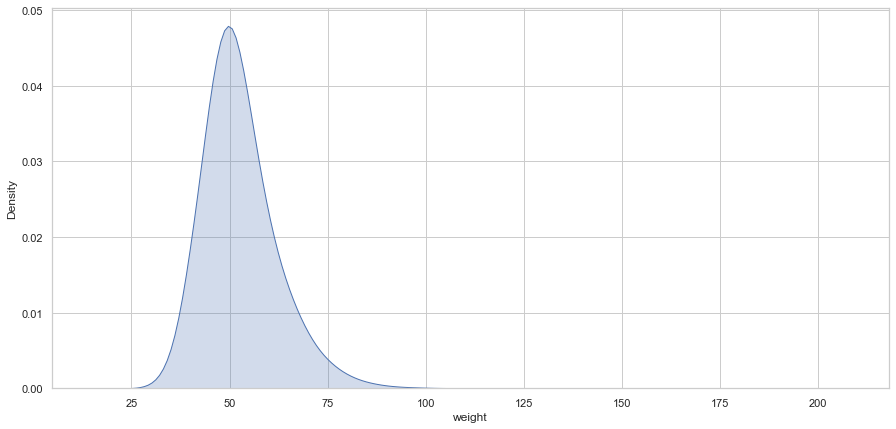

In [409]:
kde_plot('weight')

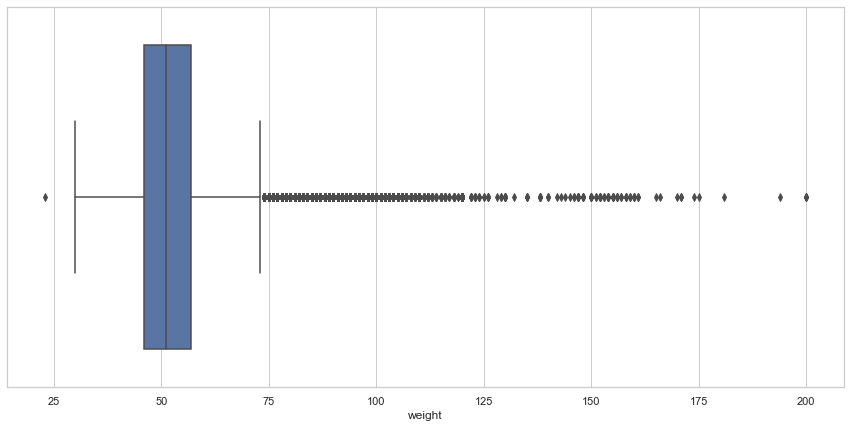

In [410]:
box_plot('weight')

In [411]:
df['weight'].describe()

count   1219438.000
mean         52.556
std           9.349
min          23.000
25%          46.000
50%          51.000
75%          57.000
max         200.000
Name: weight, dtype: float64

- No missing values.
- Mean of the distribution lies at 52kgs.
- Outliers maybe present.

## isactive

In [412]:
desc_stats('isactive')

No. of unique values: 1
Unique values: ['t']
Null values: 969189
Null %: 79.47833346180782


- 79% missing values.
- Only one unique value, which marks if the person isactive I guess.

## previous_status

In [416]:
desc_stats('previous_status')

No. of unique values: 1
Unique values: ['PW']
Null values: 0
Null %: 0.0


- The previous status of all the women registered were marked as Pregnant woman.

## ifa_given

In [417]:
desc_stats('ifa_given')

No. of unique values: 152
Unique values: [  0.  30.  60.   1.   4. 100.  11.  90.   9.  38. 160.  20.  62.  10.
  16.  22.   6.  14.  80.  50. 301.  40.  36.  72.  32. 120. 303.  53.
 200.  25.  12. 180. 360. 350. 250.  29.  70. 330. 300. 400.  39.   3.
  69.  58. 140.   8. 380. 310.  65. 101. 130. 150. 108.  95.  43.  56.
   5.  68.   2.  51.  35.  61.  15.  55.  26.  27. 260.  63. 132.  82.
  28. 181. 148.  37.  18.  21. 142. 102.  46.  98.  74.  31. 110.  85.
 240. 280.  71. 128. 306.  48.  45.  41.   7.  66.  33. 220. 122. 241.
 182. 146.  89. 201. 136. 189.  57.  52.  49.  42. 230.  19.  87.  88.
 390.  75.  78. 125.  59. 208. 144. 135.  81. 252. 290. 307. 302. 205.
 105. 188. 304. 138. 308. 190.  94.  79. 126. 119.  17.  13. 131. 170.
  54.  34.  93. 106. 152. 270. 320. 210. 123. 147. 370. 145.]
Null values: 0
Null %: 0.0


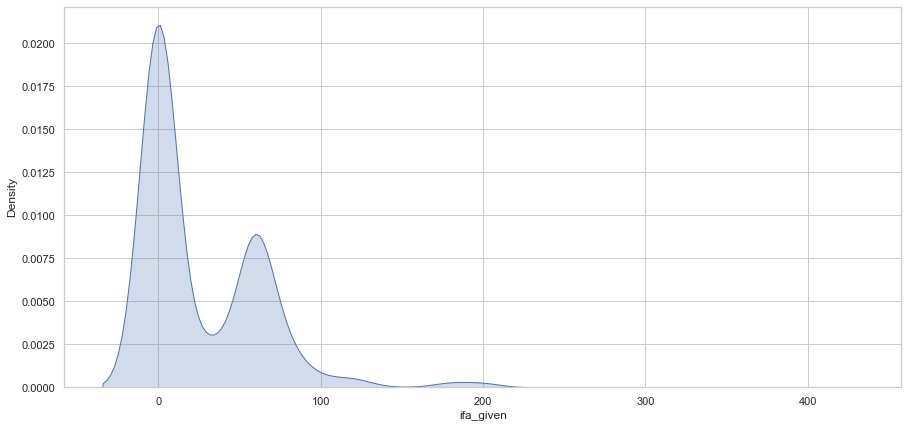

In [418]:
kde_plot('ifa_given')

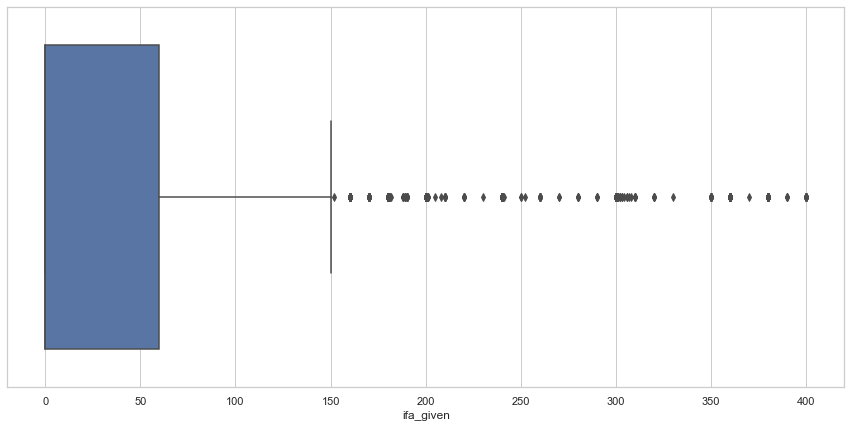

In [419]:
box_plot('ifa_given')

In [421]:
df['ifa_given'].describe()

count   1219438.000
mean         25.843
std          37.777
min           0.000
25%           0.000
50%           0.000
75%          60.000
max         400.000
Name: ifa_given, dtype: float64

- Indirect immunofluorescence assay: A laboratory test used to detect antibodies in serum or other body fluid. The specific antibodies are labeled with a compound that makes them glow an apple-green color when observed microscopically under ultraviolet light.
- No missing values.
- The mean of the distribution is around 25.
- Outliers are present.

## ppmc

In [422]:
desc_stats('ppmc')

No. of unique values: 6
Unique values: ['POST- PARTUM STERILIZATION (PPS)' 'POST- PARTUM IUCD (PP IUCD)' 'CONDOM'
 'CANT DECIDE NOW' 'ANY OTHER SPECIFY' 'MALE STERILIZATION']
Null values: 1214148
Null %: 99.56619360721906


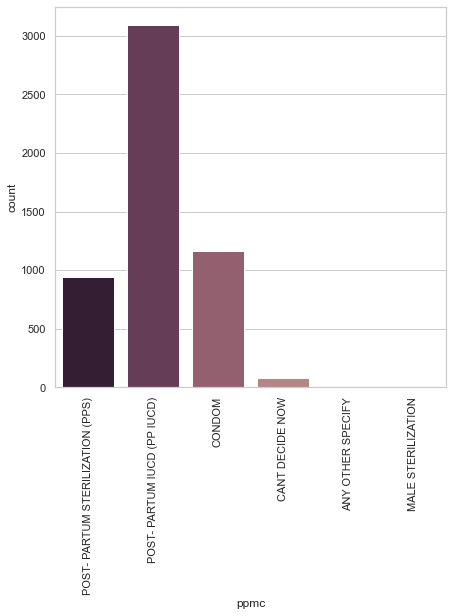

In [423]:
count_plot('ppmc')

In [424]:
df['ppmc'].value_counts()

POST- PARTUM IUCD (PP IUCD)         3090
CONDOM                              1166
POST- PARTUM STERILIZATION (PPS)     944
CANT DECIDE NOW                       83
ANY OTHER SPECIFY                      4
MALE STERILIZATION                     3
Name: ppmc, dtype: int64

- 99% of the values are missing, feature can be removed.
- Most of the cases are registered under 'Post-Partum IUCD'

In [425]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1219438 entries, 0 to 1219440
Data columns (total 41 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   id                         1219438 non-null  object        
 1   state                      1219438 non-null  object        
 2   district                   1218915 non-null  object        
 3   abortion_type              1346 non-null     object        
 4   abortion_date              8 non-null        object        
 5   abortion_if_any            1219438 non-null  object        
 6   abortion_preg_weeks        7 non-null        float64       
 7   rural_urban                1219438 non-null  object        
 8   odema_feet                 1219438 non-null  object        
 9   anc_date                   1219438 non-null  datetime64[ns]
 10  anc_no                     1219438 non-null  float64       
 11  bp_distolic                1219438 no

## tt_code

In [426]:
desc_stats('tt_code')

No. of unique values: 4
Unique values: ['TT/TD (1st Dose)' 'TT/TD (2nd  Dose)' 'default' 'TT/TD (Booster Dose)']
Null values: 0
Null %: 0.0


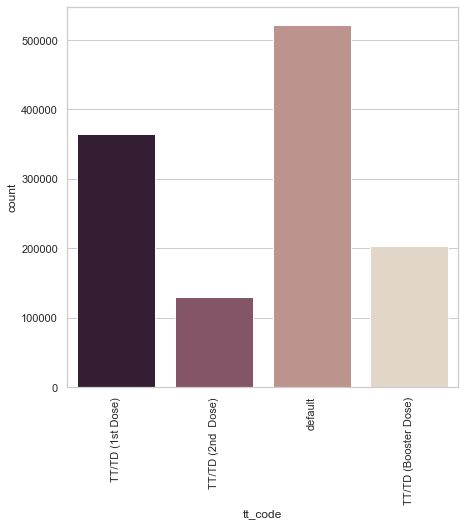

In [427]:
count_plot('tt_code')

In [8]:
df['tt_code'].value_counts()

default                 521867
TT/TD (1st Dose)        364028
TT/TD (Booster Dose)    203060
TT/TD (2nd  Dose)       130483
Name: tt_code, dtype: int64

- Most of the cases are marked 'default'.
- TT/TD (2nd Dose) is the least marked one.

In [29]:
df[df['tt_code'] == 'default']['tt_date'].unique()

array([                          'NaT', '2019-08-28T00:00:00.000000000',
       '2019-08-29T00:00:00.000000000', '2019-08-07T00:00:00.000000000',
       '2019-07-03T00:00:00.000000000', '2019-08-14T00:00:00.000000000',
       '2019-07-13T00:00:00.000000000', '2019-09-06T00:00:00.000000000',
       '2019-09-27T00:00:00.000000000', '2019-09-04T00:00:00.000000000',
       '2019-06-07T00:00:00.000000000', '2019-03-06T00:00:00.000000000',
       '2019-08-18T00:00:00.000000000', '2019-03-07T00:00:00.000000000',
       '2019-01-16T00:00:00.000000000', '2019-07-10T00:00:00.000000000',
       '2019-07-24T00:00:00.000000000', '2019-06-14T00:00:00.000000000',
       '2019-06-19T00:00:00.000000000', '2019-05-21T00:00:00.000000000',
       '2019-06-26T00:00:00.000000000', '2019-08-08T00:00:00.000000000',
       '2019-07-11T00:00:00.000000000', '2019-05-08T00:00:00.000000000',
       '2018-03-08T00:00:00.000000000', '2019-05-24T00:00:00.000000000',
       '2019-06-01T00:00:00.000000000', '2019-06-04

## urine_test

In [6]:
desc_stats('urine_test')

No. of unique values: 3
Unique values: ['Yes' 'default' 'No']
Null values: 0
Null %: 0.0


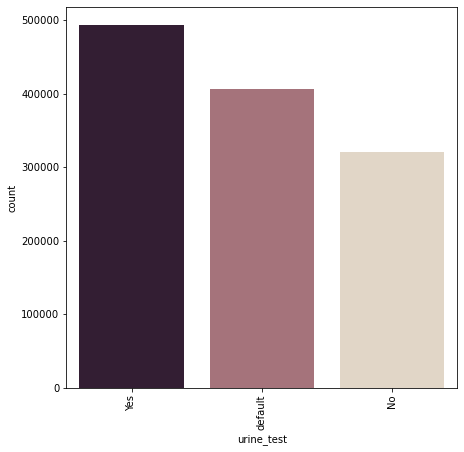

In [7]:
count_plot('urine_test')

In [9]:
df['urine_test'].value_counts()

Yes        493158
default    405941
No         320339
Name: urine_test, dtype: int64

In [35]:
for i in ['urine_albumin', 'urine_sugar']:
    for j in ['Yes', 'No', 'default']:
        print('{0}: {1}: {2}'.format(j, i, df[df['urine_test'] == j][i].unique()))

Yes: urine_albumin: ['N' 'P' nan]
No: urine_albumin: [nan 'N' 'P']
default: urine_albumin: [nan]
Yes: urine_sugar: ['N' 'P' nan]
No: urine_sugar: [nan 'N' 'P']
default: urine_sugar: [nan]


- No null values
- Most of the cases are marked "Yes", not sure what Yes means.
- Not much difference in the values.

## foetal_movements

In [11]:
desc_stats('foetal_movements')

No. of unique values: 5
Unique values: ['default' 'Normal' 'Increased' 'Absent' 'Decreased']
Null values: 0
Null %: 0.0


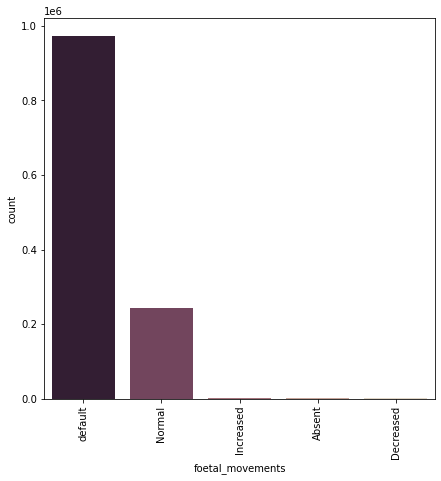

In [12]:
count_plot('foetal_movements')

In [14]:
df['foetal_movements'].value_counts()

default      972414
Normal       242582
Increased      1657
Absent         1404
Decreased      1381
Name: foetal_movements, dtype: int64

- No missing values.
- Most of the cases marked 'default', not sure what default means.

## created_on

In [15]:
desc_stats('created_on')

No. of unique values: 751456
Unique values: ['2019-06-26 15:34:56' '2019-06-26 11:20:41' '2017-05-27 12:39:27' ...
 '2020-04-10 13:40:21' '2020-02-20 10:39:40' '2020-02-20 10:39:41']
Null values: 0
Null %: 0.0


In [17]:
date_series = df.groupby(df['created_on'].dt.strftime('%Y-%m'))['id'].size().sort_index()

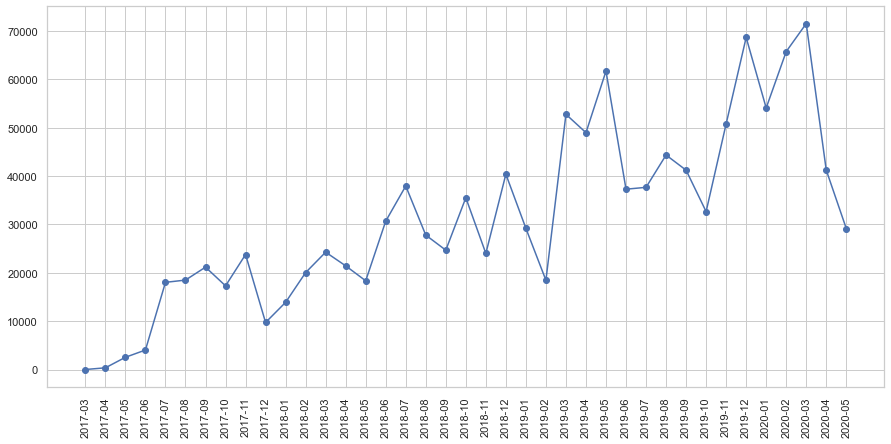

In [23]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (15, 7))
plt.plot(date_series.index, date_series, marker = 'o')
plt.xticks(rotation = 90)
plt.show()

In [24]:
df['created_on'].value_counts()

2020-03-05 05:30:00    2762
2019-12-19 05:30:00    2757
2020-03-06 05:30:00    2740
2020-03-24 05:30:00    2642
2019-12-17 05:30:00    2611
                       ... 
2019-01-03 15:15:10       1
2018-05-15 10:44:39       1
2018-04-12 12:19:14       1
2018-06-05 12:31:25       1
2017-10-09 11:39:39       1
Name: created_on, Length: 751456, dtype: int64

In [25]:
date_series.describe()

count       39.000000
mean     31267.641026
std      18545.142954
min         11.000000
25%      18471.000000
50%      29147.000000
75%      41206.000000
max      71496.000000
Name: id, dtype: float64

In [26]:
day_series = df.groupby(df['created_on'].dt.strftime('%Y-%m-%d'))['id'].size().sort_index()

In [28]:
day_series

created_on
2017-03-07       1
2017-03-08       1
2017-03-21       6
2017-03-22       3
2017-04-05       3
              ... 
2020-05-26     944
2020-05-27     689
2020-05-28    1000
2020-05-29     830
2020-05-30     608
Name: id, Length: 1148, dtype: int64

In [30]:
day_series.sort_values(ascending = False)

created_on
2019-03-29    10064
2019-03-28     4629
2019-09-03     4260
2019-11-25     3949
2019-12-17     3771
              ...  
2017-03-08        1
2017-04-06        1
2017-04-30        1
2017-05-19        1
2017-03-07        1
Name: id, Length: 1148, dtype: int64

In [31]:
day_series.describe()

count     1148.000000
mean      1062.228223
std        871.522886
min          1.000000
25%        399.500000
50%        921.500000
75%       1504.250000
max      10064.000000
Name: id, dtype: float64

- Assuming the feature refers to the date on which the case was registered.
- No missing values.
- Most no. of cases registered in March 2020 & the least in March 2017.
- A max. of 10064 cases were registered on the same day.
- An average of 31267 case were registered each month & an average of 1062 cases were registered each day.

## hb_gm

In [32]:
desc_stats('hb_gm')

No. of unique values: 148
Unique values: [11.2 10.  11.6  0.  10.4 11.   9.8 10.6 12.2 10.8  9.6  9.  10.5  7.6
  8.6  9.4 11.8  8.8  9.2 11.4 10.2 10.1  8.4 13.  12.  11.9  6.8 12.5
  9.9 12.8  9.7  8.7  9.5 12.1  7.8 10.7 12.7 10.9  8.2  7.   8.5 13.6
  4.  11.1  8.  10.3 12.3 11.7 13.2 11.5 12.4  9.3 14.  12.6 12.9 13.4
  8.3 11.3  2.  13.8  7.2 13.5  8.9  9.1  6.  13.7 13.1  6.6 18.   7.5
 15.   7.9 13.3  3.5 14.4 14.3 14.1  7.4 14.2  6.4  5.4 14.5 14.7  8.1
 16.8  6.2  5.6 14.9  7.7  5.  13.9 15.4  6.3  5.3  5.8  7.1  7.3  6.5
  5.2  6.7  6.9 16.   4.8  3.   4.5  5.1  6.1  2.7  4.4  4.6  5.9  5.5
 14.6  4.2 16.6 14.8 17.6 16.3  2.5  2.4  5.7  4.7 15.8  2.6  4.9  2.8
 15.5  3.2  4.1  3.8 15.2 17.9  4.3  3.1  3.3  2.2 16.1  2.9 15.1 17.
 17.5 16.2  3.6 15.3  3.4 16.5 15.9 17.2]
Null values: 0
Null %: 0.0


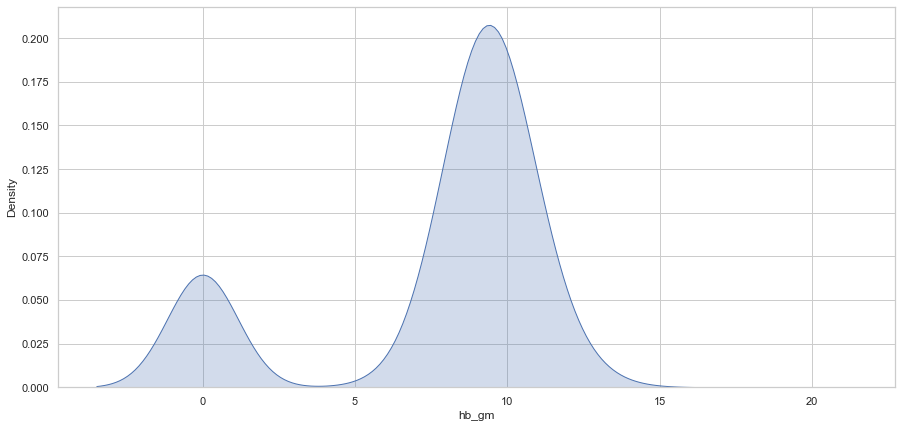

In [33]:
kde_plot('hb_gm')

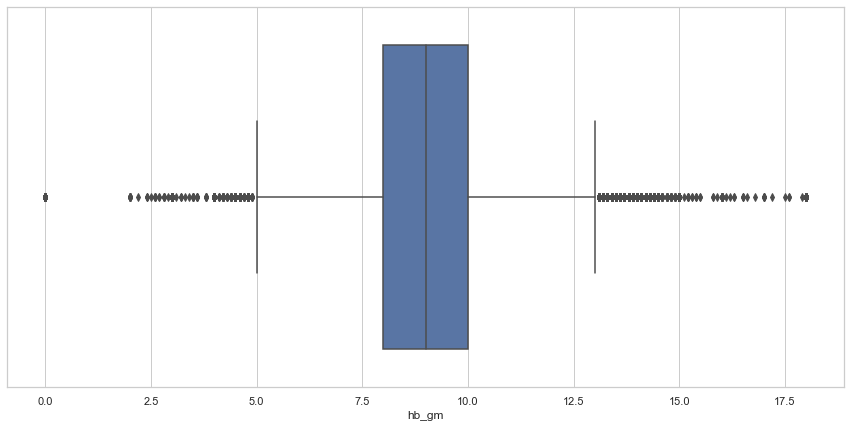

In [35]:
box_plot('hb_gm')

In [37]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [38]:
df['hb_gm'].describe()

count   1219438.000
mean          7.680
std           3.826
min           0.000
25%           8.000
50%           9.000
75%          10.000
max          18.000
Name: hb_gm, dtype: float64

- Feature refers to Heamoglobin levels
- No missing values
- Distribution centered around 8 gm/DL.
- Mean of the distribution is aroung 7.6 gm/DL.
- Normal range of female humans is 12.1-15.1 gm/DL.
- Outliers are present.

## Univariate analysis summary

- Valid features (11 features): created_on, foetal_movements, urine_test, tt_code, registration_no, blood_sugar_test, case_no, anc_no, anc_date, abortion_if_any, id
- Features having missing values; columns to be removed (17 features): abortion_type, abortion_date, abortion_preg_weeks, blood_sugar_fasting, blood_sugar_post_prandial, other_symptoms_high_risk, other_death_reason, death_date, death_reason, symptoms_high_risk, tt1_date, tt2_date, ttb_date, urine_albumin, urine_sugar, isactive, ppmc
- Features having outliers; rows to be removed (6 features): bp_distolic, bp_systolic, pregnancy_month, hb_gm, ifa_given, weight,
- Features having missing values; values to be imputed (2 features): district, tt_date 
- Features having single value; columns to be removed (5 features): state, odema_feet, rural_urban, maternal_death, previous_status

In [45]:
11+17+6+2+5-17

24

## Cleaning the data

In [6]:
df = df_anc.copy()
df.shape

(1219442, 41)

#### Removing features with high missing values

In [7]:
df = df.drop(columns = ['abortion_type', 'abortion_date', 'abortion_preg_weeks', 'blood_sugar_fasting', 'blood_sugar_post_prandial', 
                        'other_symptoms_high_risk', 'other_death_reason', 'death_date', 'death_reason', 'symptoms_high_risk', 'tt1_date', 
                        'tt2_date', 'ttb_date', 'urine_albumin', 'urine_sugar', 'isactive', 'ppmc'])

In [8]:
df.shape

(1219442, 24)

#### Removing features with single unique value

In [9]:
df = df.drop(columns = ['state', 'odema_feet', 'rural_urban', 'maternal_death', 'previous_status'])

In [10]:
df.shape

(1219442, 19)

#### Converting date features to datetime type

In [11]:
df['anc_date'] = pd.to_datetime(df['anc_date'], format = '%Y-%m-%d %H:%M:%S')
df['tt_date'] = pd.to_datetime(df['tt_date'], format = '%Y-%m-%d %H:%M:%S') 
df['created_on'] = pd.to_datetime(df['created_on'], format = '%Y-%m-%d %H:%M:%S')
df = df.drop(df[df['anc_date'].dt.strftime('%Y') > '2020'].index)
df = df.dropna(subset = ['bp_systolic'])

In [12]:
df.shape

(1219438, 19)

## Detecting outliers using Z score

In [13]:
df_outliers = df[['bp_systolic', 'bp_distolic']]

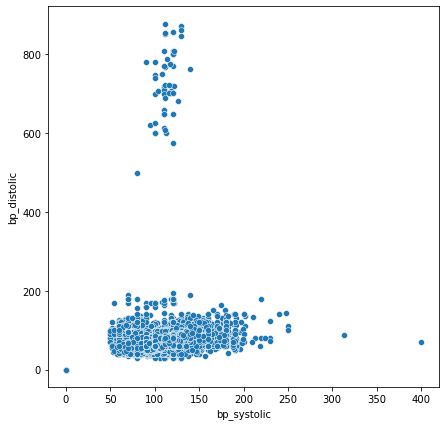

In [14]:
plt.figure(figsize = (7, 7))
sns.scatterplot(x = 'bp_systolic', y = 'bp_distolic', data = df_outliers)
plt.show()

In [15]:
df_outliers.shape

(1219438, 2)

In [16]:
df_outliers.loc[df_outliers[(np.abs(zscore(df_outliers)) < 3).all(axis=1)].index, 'outliers'] = 'No'

E:\Gokul\Anaconda\envs\mldev\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
E:\Gokul\Anaconda\envs\mldev\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [17]:
df_outliers['outliers'] = df_outliers['outliers'].fillna('Yes')

<ipython-input-17-7989962427c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outliers['outliers'] = df_outliers['outliers'].fillna('Yes')


In [18]:
df_outliers['outliers'].value_counts()

No     1219315
Yes        123
Name: outliers, dtype: int64

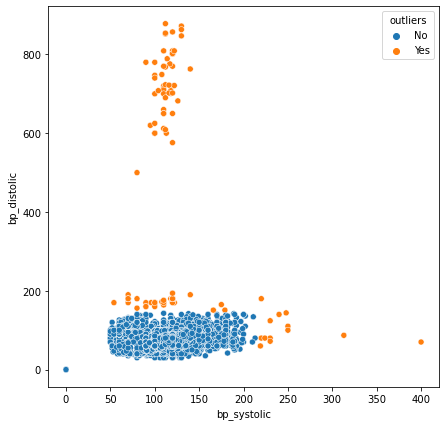

In [19]:
plt.figure(figsize = (7, 7))
sns.scatterplot(x = 'bp_systolic', y = 'bp_distolic', hue = 'outliers', data = df_outliers)
plt.show()

- Detecting outliers using Z-score seems to work fine.

## Detecting outliers using Isolation forest

In [29]:
df_outliers = df[['bp_systolic', 'bp_distolic']].to_numpy()

In [30]:
df_outliers.shape

(1219438, 2)

In [31]:
df_outliers

array([[100.,  71.],
       [100.,  70.],
       [114.,  81.],
       ...,
       [110.,  78.],
       [112.,  80.],
       [120.,  80.]])

<AxesSubplot:>

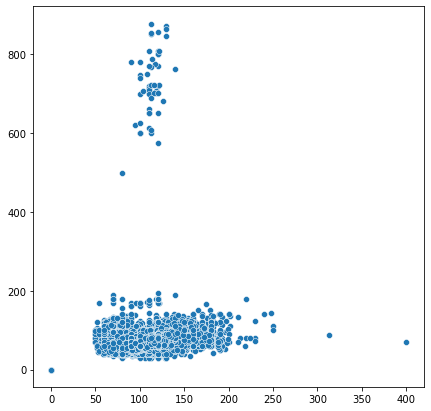

In [32]:
plt.figure(figsize = (7, 7))
sns.scatterplot(x = df_outliers[:, 0], y = df_outliers[:, 1])

In [38]:
iso = IsolationForest(contamination = 0.01)
yhat = iso.fit_predict(df_outliers)

In [39]:
yhat

array([1, 1, 1, ..., 1, 1, 1])

In [40]:
df_outliers = pd.DataFrame(df_outliers, columns = ['bp_systolic', 'bp_distolic'])
df_outliers['outlier'] = yhat

In [41]:
df_outliers['outlier'].unique()

array([ 1, -1])

<AxesSubplot:xlabel='bp_systolic', ylabel='bp_distolic'>

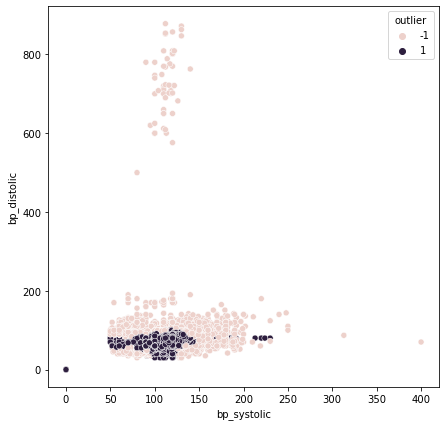

In [42]:
plt.figure(figsize = (7, 7))
sns.scatterplot(x = df_outliers['bp_systolic'], y = df_outliers['bp_distolic'], hue = df_outliers['outlier'])

- Isolation forest not working properly on our dataset.

## Detecting outliers using Mahalanobis distance

In [59]:
df_outliers = df[['bp_distolic', 'bp_systolic']].to_numpy()

In [32]:
df_outliers.shape

(1219438, 2)

In [33]:
covariance = np.cov(df_outliers, rowvar = False)

In [34]:
covariance

array([[ 774.40987624, 1120.2892772 ],
       [1120.2892772 , 1751.04192652]])

In [35]:
covariance_pm1 = np.linalg.matrix_power(covariance, -1)

In [36]:
covariance_pm1

array([[ 0.01734115, -0.0110946 ],
       [-0.0110946 ,  0.00766924]])

In [37]:
centerpoint = np.mean(df_outliers, axis = 0)

In [38]:
centerpoint

array([60.57594482, 93.40296596])

In [41]:
distances = []
for i, val in enumerate(df_outliers):
    p1 = val
    p2 = centerpoint
    distance = (p1 - p2).T.dot(covariance_pm1).dot(p1 - p2)
    distances.append(distance)
distances = np.array(distances)

In [42]:
distances

array([0.69217428, 0.49436806, 1.15286533, ..., 0.96047303, 1.17971581,
       0.50451532])

In [43]:
cutoff = chi2.ppf(0.95, df_outliers.shape[1])

In [44]:
cutoff

5.991464547107979

In [45]:
outlierIndexes = np.where(distances > cutoff)

In [49]:
outlierIndexes[0]

array([     40,      56,      79, ..., 1219311, 1219386, 1219391],
      dtype=int64)

In [50]:
df_outliers[outlierIndexes]

array([[100., 121.],
       [ 91., 100.],
       [ 88., 105.],
       ...,
       [ 68.,  70.],
       [ 61., 127.],
       [ 85., 100.]])

In [60]:
df_outliers = pd.DataFrame(df_outliers, columns = ['bp_distolic', 'bp_systolic'])

In [61]:
df_outliers.loc[:, 'outlier'] = 'No'
df_outliers.loc[outlierIndexes[0], 'outlier'] = 'Yes'

<AxesSubplot:xlabel='bp_distolic', ylabel='bp_systolic'>

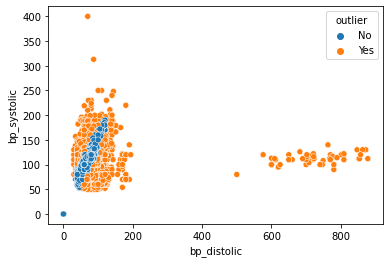

In [64]:
sns.scatterplot(x = 'bp_distolic', y = 'bp_systolic', hue = 'outlier', data = df_outliers)

- Z score looks like a good method for removing outliers.

In [30]:
df[np.abs(zscore(df['bp_distolic'])  3)]

,id,district,abortion_if_any,anc_date,anc_no,bp_distolic,bp_systolic,case_no,blood_sugar_test,registration_no,tt_date,pregnancy_month,weight,ifa_given,tt_code,urine_test,foetal_movements,created_on,hb_gm
0,1,Panchkula,No,2019-05-28,1.0,71.0,100.0,2.0,default,1.060000e+11,2019-05-28,5.0,40.0,0.0,TT/TD (1st Dose),Yes,default,2019-06-26 15:34:56,11.2
1,2,Panchkula,No,2019-05-14,1.0,70.0,100.0,2.0,default,1.060000e+11,2019-05-14,9.0,67.0,0.0,TT/TD (2nd Dose),Yes,default,2019-06-26 11:20:41,10.0
2,3,Panchkula,No,2017-04-11,1.0,81.0,114.0,1.0,No,1.060024e+11,2017-04-11,9.0,45.0,0.0,TT/TD (2nd Dose),Yes,default,2017-05-27 12:39:27,11.6
3,4,Panchkula,No,2017-04-11,1.0,83.0,118.0,1.0,No,1.060024e+11,2017-04-11,7.0,70.0,0.0,TT/TD (2nd Dose),Yes,default,2017-05-27 12:52:16,10.0
4,5,Panchkula,No,2017-04-11,1.0,83.0,109.0,1.0,No,1.060024e+11,2017-04-11,34.0,44.0,0.0,TT/TD (2nd Dose),Yes,default,2017-05-27 13:02:54,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219436,1219437,Kaithal,No,2020-01-09,3.0,82.0,114.0,1.0,No,1.060043e+11,NaT,35.0,55.0,80.0,default,Yes,default,2020-02-20 10:39:41,9.9
1219437,1219438,Kaithal,No,2019-09-23,1.0,78.0,120.0,1.0,No,1.060044e+11,NaT,6.0,45.0,0.0,default,Yes,default,2020-03-13 18:45:03,9.0
1219438,1219439,Kaithal,No,2019-12-26,2.0,78.0,110.0,1.0,No,1.060044e+11,2019-11-20,19.0,48.0,60.0,TT/TD (1st Dose),Yes,default,2020-03-13 18:45:04,9.9
1219439,1219440,Kaithal,No,2020-01-16,3.0,80.0,112.0,1.0,No,1.060044e+11,2020-01-15,22.0,49.0,60.0,TT/TD (Booster Dose),Yes,default,2020-03-13 18:45:04,7.5


In [31]:
df.shape

(1219438, 19)

# Checking no. of outliers in each column

In [20]:
for i in ['bp_distolic', 'bp_systolic', 'pregnancy_month', 'hb_gm', 'ifa_given', 'weight']:
    n_outliers = df[np.abs(zscore(df[i]) > 3)].shape[0]
    print("{0}: {1}".format(i, n_outliers))

bp_distolic: 111
bp_systolic: 13
pregnancy_month: 19
hb_gm: 0
ifa_given: 17828
weight: 11873


In [21]:
for i in ['bp_distolic', 'bp_systolic', 'pregnancy_month', 'hb_gm', 'ifa_given', 'weight']:
    df = df[np.abs(zscore(df[i]) < 3)]

In [22]:
df.shape

(1189773, 19)

In [23]:
df['district'].value_counts()

Hisar           171497
Karnal          148058
Kaithal         124151
Jind            118237
Mahendragarh    117087
Sirsa           114880
Ambala           97029
Yamunanagar      89150
Gurgaon          79718
Palwal           62920
Panchkula        37187
Mewat            29355
Name: district, dtype: int64

In [24]:
df['district'].isna().sum()

504

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1189773 entries, 0 to 1219440
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   id                1189773 non-null  object        
 1   district          1189269 non-null  object        
 2   abortion_if_any   1189773 non-null  object        
 3   anc_date          1189773 non-null  datetime64[ns]
 4   anc_no            1189773 non-null  float64       
 5   bp_distolic       1189773 non-null  float64       
 6   bp_systolic       1189773 non-null  float64       
 7   case_no           1189773 non-null  float64       
 8   blood_sugar_test  1189773 non-null  object        
 9   registration_no   1189773 non-null  float64       
 10  tt_date           679602 non-null   datetime64[ns]
 11  pregnancy_month   1189773 non-null  float64       
 12  weight            1189773 non-null  float64       
 13  ifa_given         1189773 non-null  float6

In [26]:
df['district'] = df['district'].fillna('Not available')

In [27]:
df['district'].value_counts()

Hisar            171497
Karnal           148058
Kaithal          124151
Jind             118237
Mahendragarh     117087
Sirsa            114880
Ambala            97029
Yamunanagar       89150
Gurgaon           79718
Palwal            62920
Panchkula         37187
Mewat             29355
Not available       504
Name: district, dtype: int64

In [28]:
df['tt_date'].isna().mean()

0.4287969217657486

In [29]:
df = df.drop(columns = 'tt_date')

In [30]:
df.shape

(1189773, 18)

In [31]:
df.isna().mean()

id                  0.0
district            0.0
abortion_if_any     0.0
anc_date            0.0
anc_no              0.0
bp_distolic         0.0
bp_systolic         0.0
case_no             0.0
blood_sugar_test    0.0
registration_no     0.0
pregnancy_month     0.0
weight              0.0
ifa_given           0.0
tt_code             0.0
urine_test          0.0
foetal_movements    0.0
created_on          0.0
hb_gm               0.0
dtype: float64

In [32]:
df.to_csv('../data/csv_data/cleaned_data/anc.csv')